## Importing Libraries

In [1]:
import numpy as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

import eda_helper_functions as eda

## Reading the training CSV file

In [2]:
train=pd.read_csv("data/train.csv")

In [3]:
train

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,Female,No,No,No,43,No,No phone service,DSL,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),49.05,2076.20,Yes
1,Male,No,No,No,3,Yes,No,DSL,No,No,No,No,Yes,No,Month-to-month,No,Credit card (automatic),53.40,188.70,Yes
2,Female,No,Yes,No,55,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,77.75,4458.15,Yes
3,Male,No,Yes,Yes,45,Yes,No,DSL,Yes,No,No,Yes,No,No,Two year,No,Bank transfer (automatic),54.65,2553.70,No
4,Female,No,Yes,Yes,55,Yes,Yes,Fiber optic,Yes,No,No,No,Yes,Yes,One year,No,Mailed check,100.90,5448.60,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5620,Male,No,No,No,3,Yes,Yes,DSL,No,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),50.40,137.25,No
5621,Female,No,No,No,51,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,111.50,5703.25,No
5622,Male,No,No,No,9,Yes,Yes,Fiber optic,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,81.15,784.45,No
5623,Female,No,No,No,50,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),19.75,989.05,No


## High-Level Summary of Data 

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5625 entries, 0 to 5624
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5625 non-null   object 
 1   seniorcitizen     5625 non-null   object 
 2   partner           5625 non-null   object 
 3   dependents        5625 non-null   object 
 4   tenure            5625 non-null   int64  
 5   phoneservice      5625 non-null   object 
 6   multiplelines     5625 non-null   object 
 7   internetservice   5625 non-null   object 
 8   onlinesecurity    5625 non-null   object 
 9   onlinebackup      5625 non-null   object 
 10  deviceprotection  5625 non-null   object 
 11  techsupport       5625 non-null   object 
 12  streamingtv       5625 non-null   object 
 13  streamingmovies   5625 non-null   object 
 14  contract          5625 non-null   object 
 15  paperlessbilling  5625 non-null   object 
 16  paymentmethod     5625 non-null   object 


In [5]:
train.isnull().sum()

gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [6]:
(
  train
  .describe(include="O")
)

,gender,seniorcitizen,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,churn
count,5625,5625,5625,5625,5625,5625,5625,5625,5625,5625,5625,5625,5625,5625,5625,5625,5625
unique,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,No
freq,2851,4721,2920,3941,5076,2731,2472,2775,2443,2464,2762,2222,2201,3087,3326,1902,4130


- Most customers are Male, without dependents, and use paperless billing.
- Most customers are on month-to-month contracts, and they show the highest churn rate based on cross-tab analysis.
- Fiber optic users churn more than DSL or No Internet customers.
- Customers using tech support or online security tend to churn less.
- Electronic check is the most used payment method and shows higher churn.

In [7]:
pd.crosstab(train['contract'], train['churn'], normalize='index')

churn,No,Yes
contract,,
Month-to-month,0.569485,0.430515
One year,0.894207,0.105793
Two year,0.970304,0.029696


In [8]:
pd.crosstab(train['paymentmethod'], train['churn'], normalize='index')

churn,No,Yes
paymentmethod,,
Bank transfer (automatic),0.826811,0.173189
Credit card (automatic),0.851429,0.148571
Electronic check,0.550473,0.449527
Mailed check,0.807247,0.192753


In [9]:
(
  train
  .drop(columns=['seniorcitizen'])
  .describe(include="number")
)

,tenure,monthlycharges,totalcharges
count,5625.000000,5625.000000,5625.000000
mean,32.335289,64.697431,2275.300871
std,24.537144,30.173948,2265.083247
min,1.000000,18.250000,18.850000
25%,9.000000,35.200000,397.000000
50%,29.000000,70.350000,1388.000000
75%,55.000000,89.900000,3767.400000
max,72.000000,118.750000,8684.800000


- Tenure is right-skewed; most customers are mid-term with few long-term users.
- Monthly charges show left-skew; many pay higher bills, but some low-paying users pull the average down.
- Total charges are highly skewed; a few high-value customers raise the average.

## 4. High-level analysis of Missing Values

In [10]:
eda.missing_info(train)

,count,percentage
variable,,


- There is no missing value found 

0       Female
1         Male
2       Female
3         Male
4       Female
         ...  
5620      Male
5621    Female
5622      Male
5623    Female
5624      Male
Name: gender, Length: 5625, dtype: object

Data Type      : object
Cardinality    : 2 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 5,625 / 5,625 rows


,
count,5625
unique,2
top,Male
freq,2851


,count,percentage
category,,
Male,2851,0.506844
Female,2774,0.493156


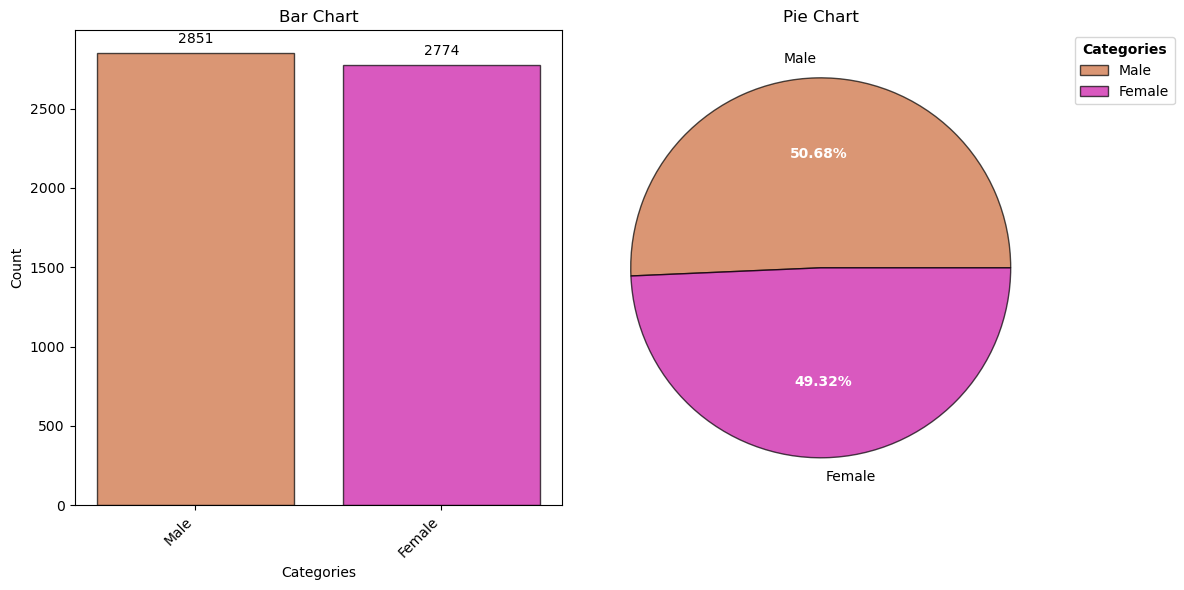

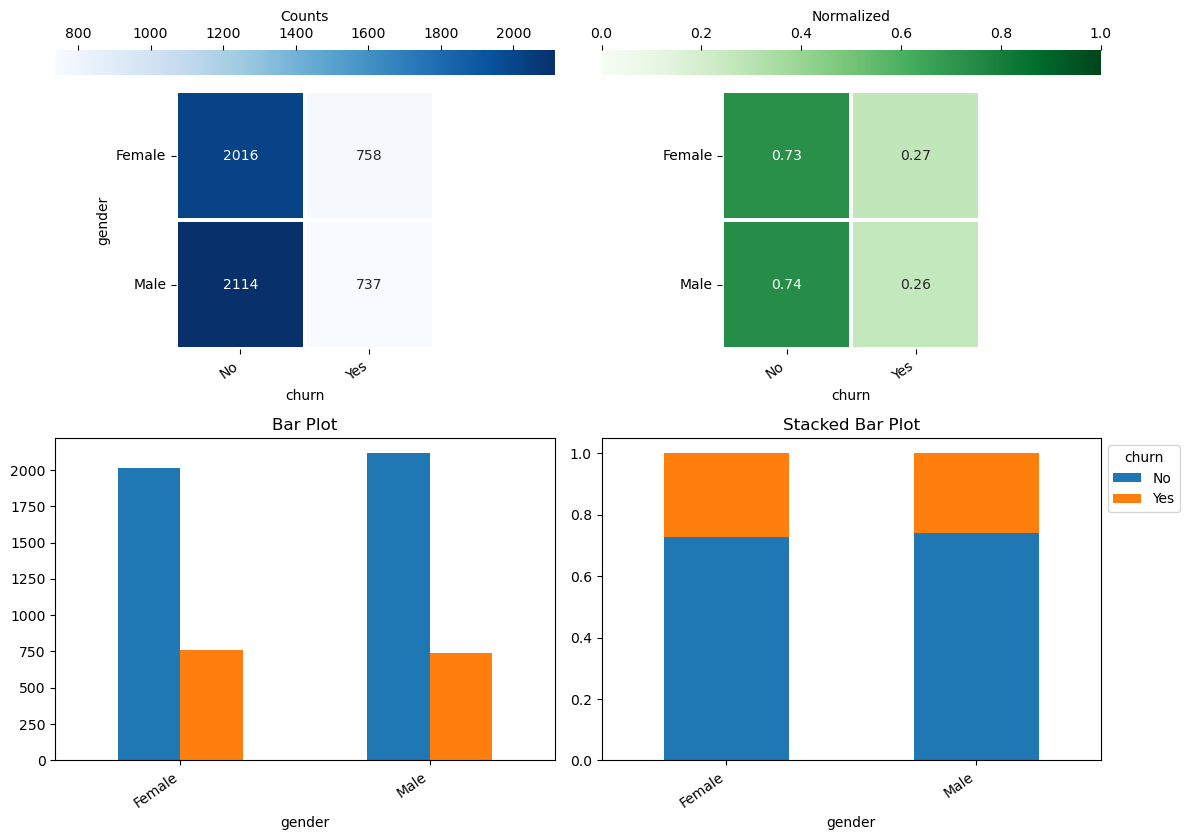

- Cramers V            : 0.009351520882334522
- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 1.4920018962175792
- p-value              : 0.2219061139602113
- Since p-value is greater than 0.05, we Fail to Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables gender and churn are uncorrelated


0        No
1        No
2        No
3        No
4        No
       ... 
5620     No
5621     No
5622     No
5623     No
5624    Yes
Name: seniorcitizen, Length: 5625, dtype: object

Data Type      : object
Cardinality    : 2 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 5,625 / 5,625 rows


,
count,5625
unique,2
top,No
freq,4721


,count,percentage
category,,
No,4721,0.839289
Yes,904,0.160711


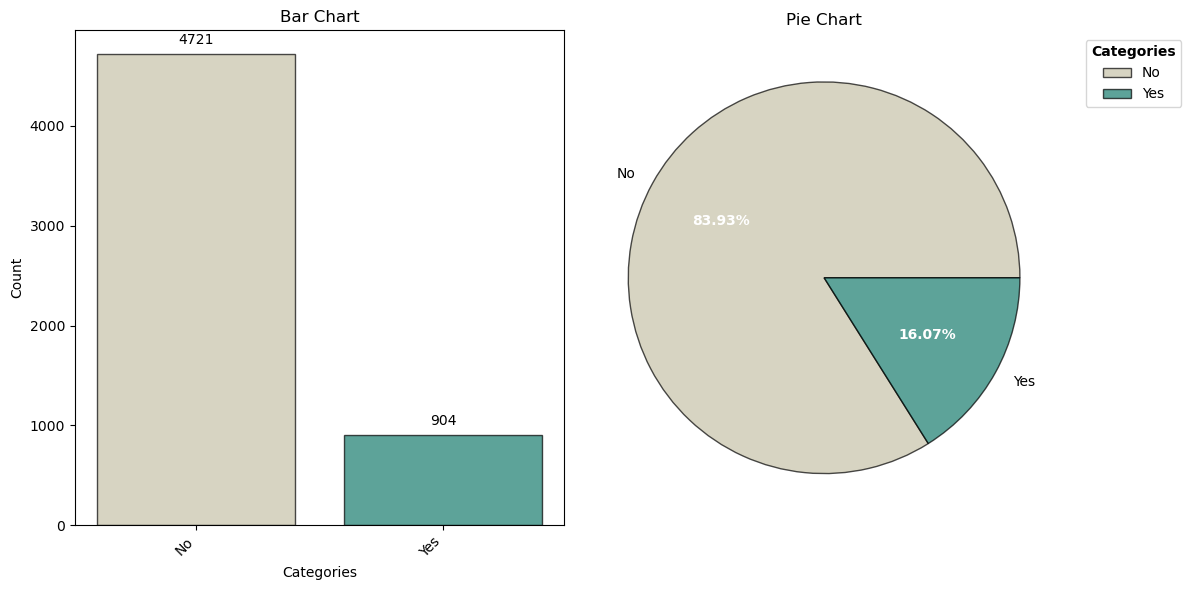

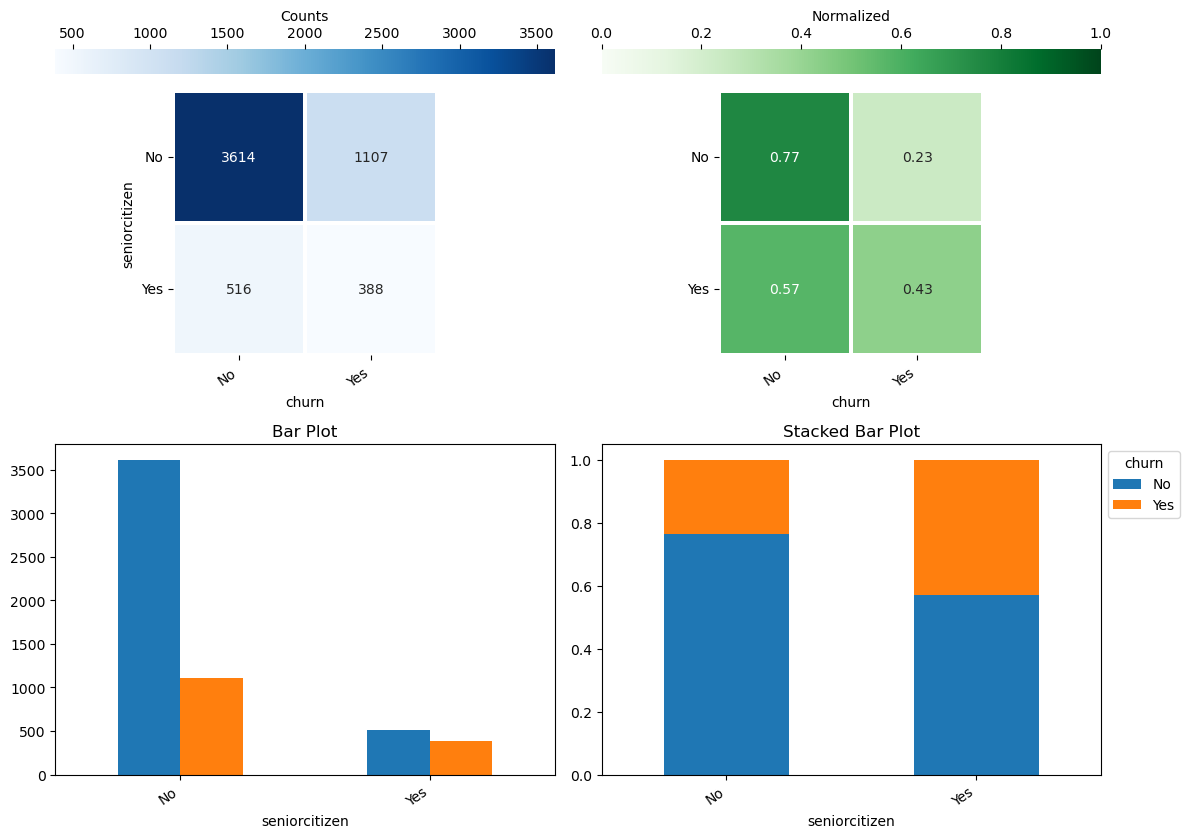

- Cramers V            : 0.16080241331001
- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 146.42228150613911
- p-value              : 1.0496028637542782e-33
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables seniorcitizen and churn are correlated


0        No
1        No
2       Yes
3       Yes
4       Yes
       ... 
5620     No
5621     No
5622     No
5623     No
5624    Yes
Name: partner, Length: 5625, dtype: object

Data Type      : object
Cardinality    : 2 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 5,625 / 5,625 rows


,
count,5625
unique,2
top,No
freq,2920


,count,percentage
category,,
No,2920,0.519111
Yes,2705,0.480889


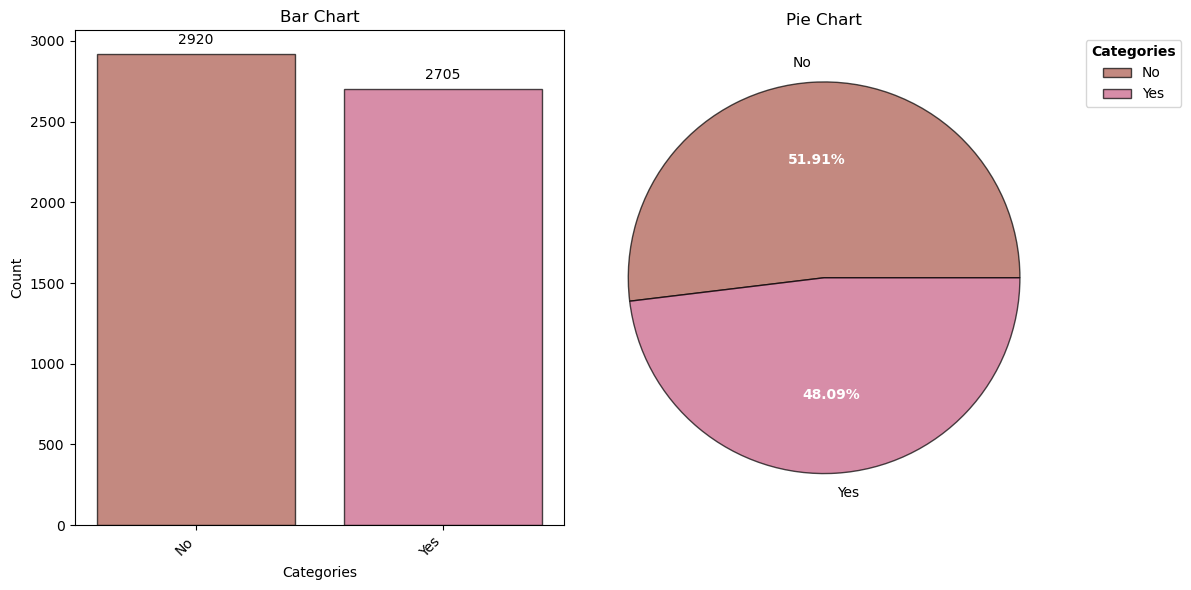

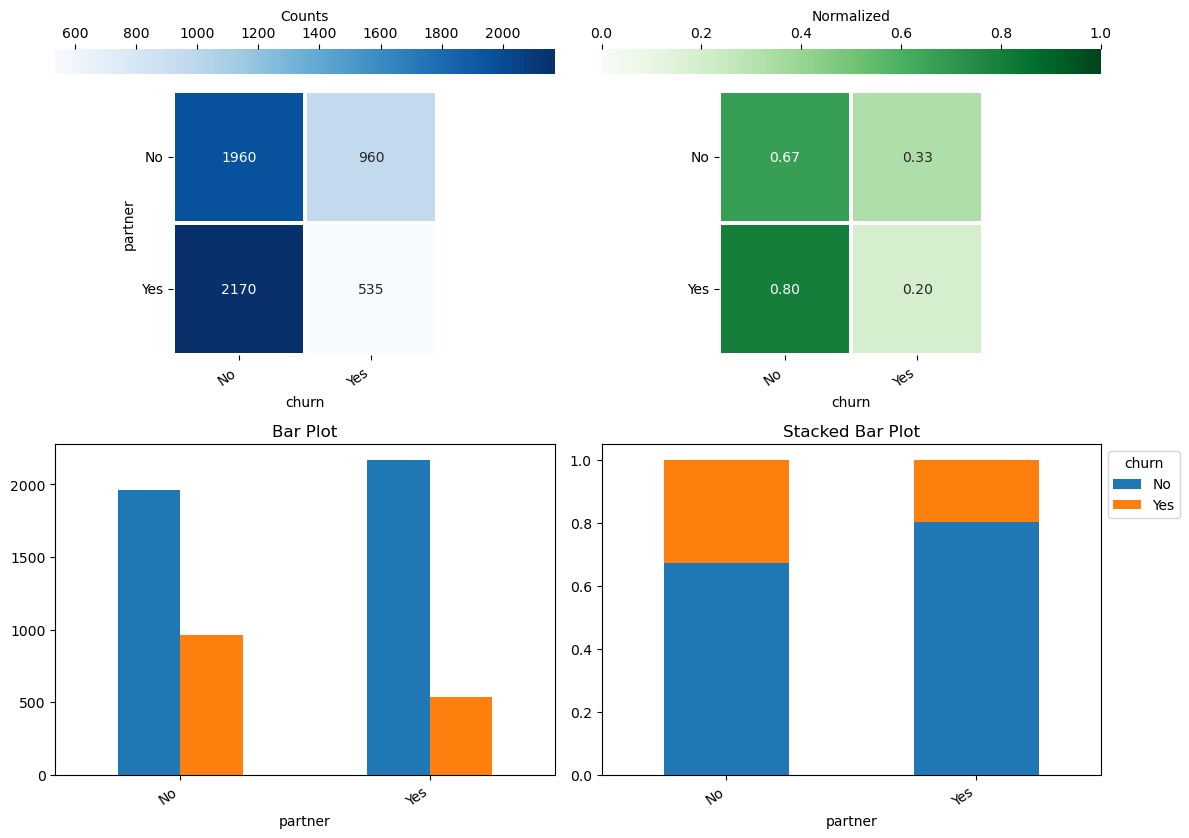

- Cramers V            : 0.1471574274025488
- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 122.78962862394883
- p-value              : 1.5504669806116374e-28
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables partner and churn are correlated


0        No
1        No
2        No
3       Yes
4       Yes
       ... 
5620     No
5621     No
5622     No
5623     No
5624     No
Name: dependents, Length: 5625, dtype: object

Data Type      : object
Cardinality    : 2 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 5,625 / 5,625 rows


,
count,5625
unique,2
top,No
freq,3941


,count,percentage
category,,
No,3941,0.700622
Yes,1684,0.299378


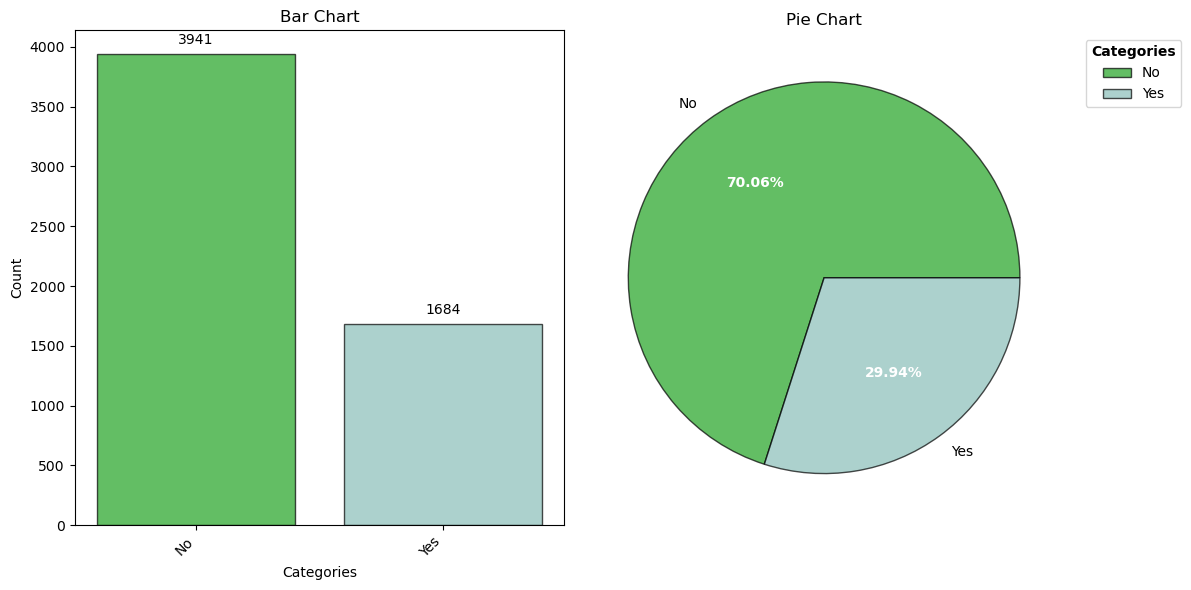

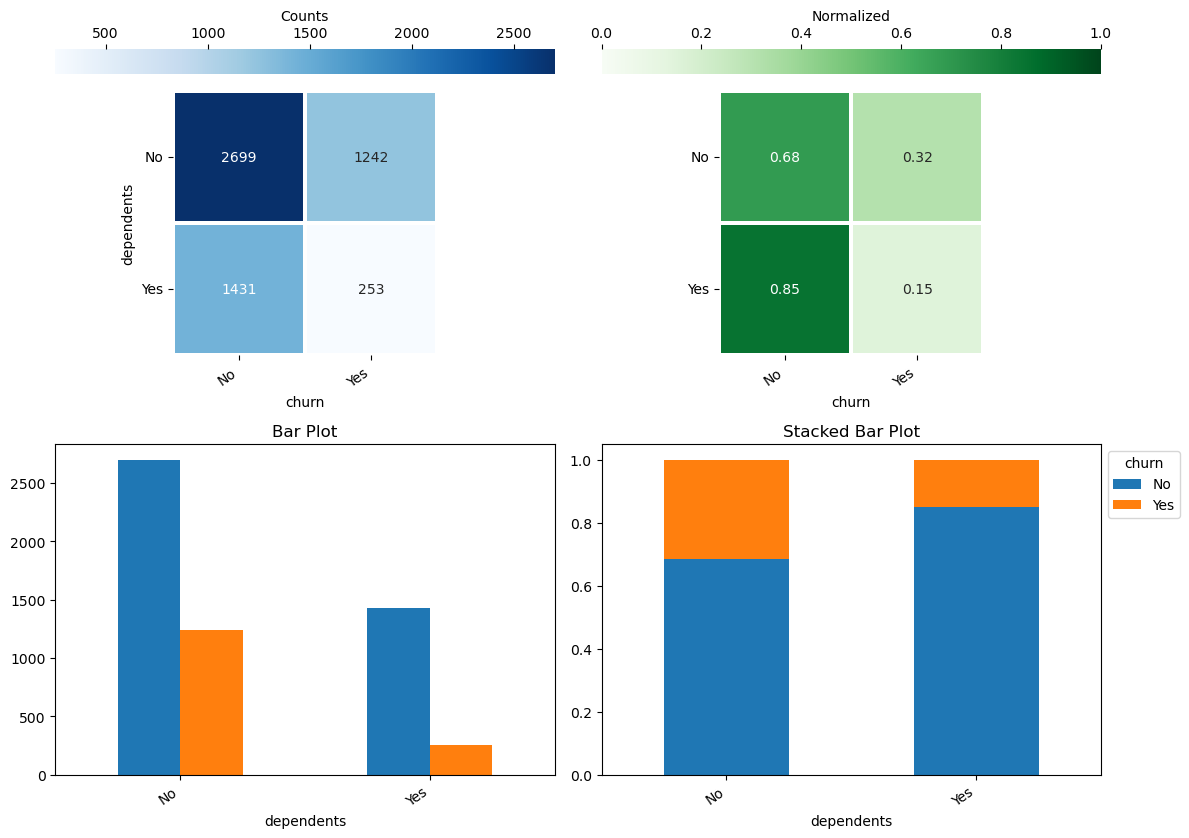

- Cramers V            : 0.17002681827969163
- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 163.58505755566472
- p-value              : 1.8638410932495935e-37
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables dependents and churn are correlated


0        No
1       Yes
2       Yes
3       Yes
4       Yes
       ... 
5620    Yes
5621    Yes
5622    Yes
5623    Yes
5624    Yes
Name: phoneservice, Length: 5625, dtype: object

Data Type      : object
Cardinality    : 2 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 5,625 / 5,625 rows


,
count,5625
unique,2
top,Yes
freq,5076


,count,percentage
category,,
Yes,5076,0.9024
No,549,0.0976


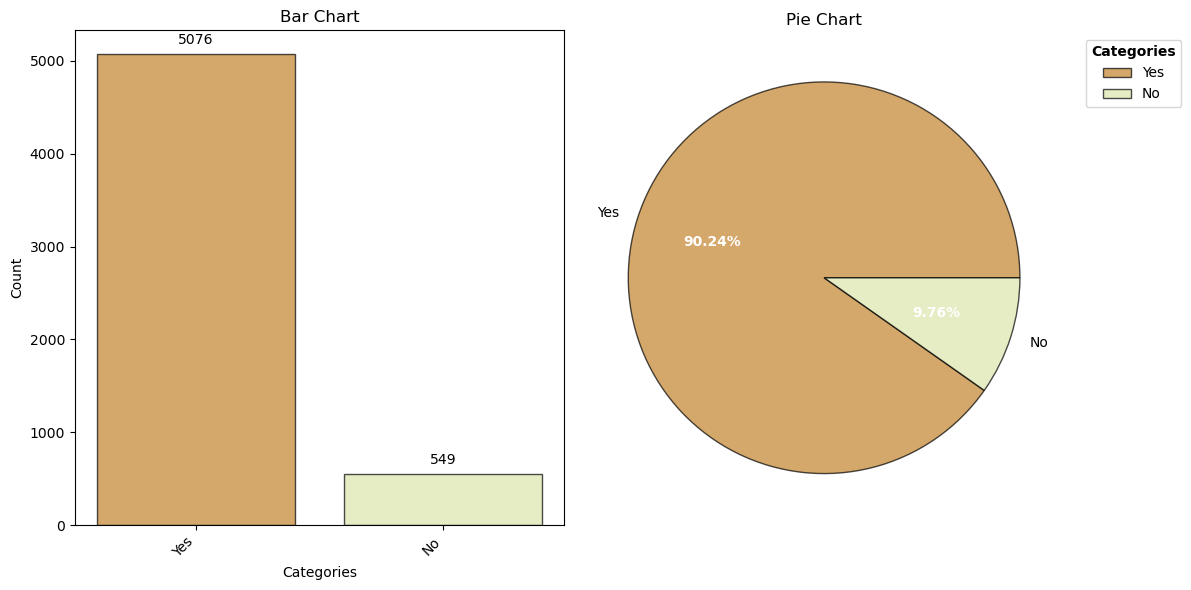

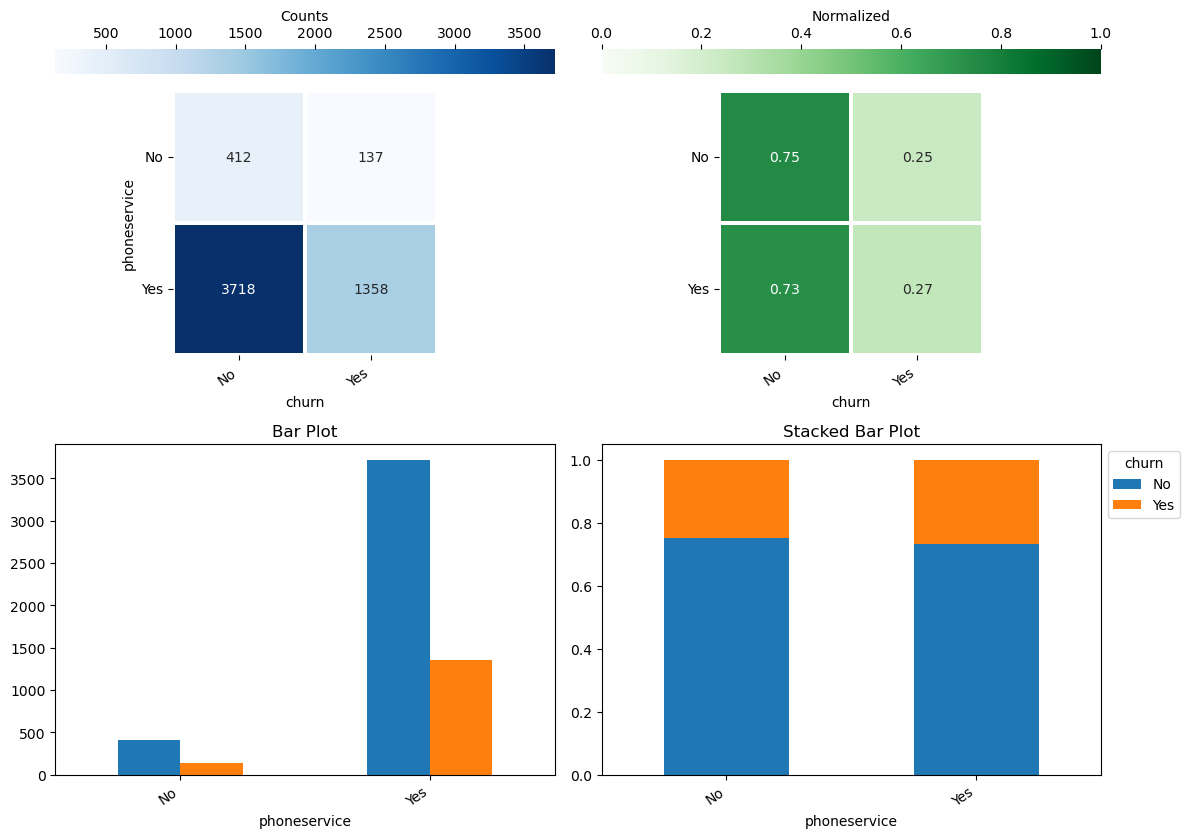

- Cramers V            : 0.0
- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.7319491422574368
- p-value              : 0.3922521243288275
- Since p-value is greater than 0.05, we Fail to Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables phoneservice and churn are uncorrelated


0       No phone service
1                     No
2                    Yes
3                     No
4                    Yes
              ...       
5620                 Yes
5621                 Yes
5622                 Yes
5623                  No
5624                  No
Name: multiplelines, Length: 5625, dtype: object

Data Type      : object
Cardinality    : 3 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 5,625 / 5,625 rows


,
count,5625
unique,3
top,No
freq,2731


,count,percentage
category,,
No,2731,0.485511
Yes,2345,0.416889
No phone service,549,0.097600


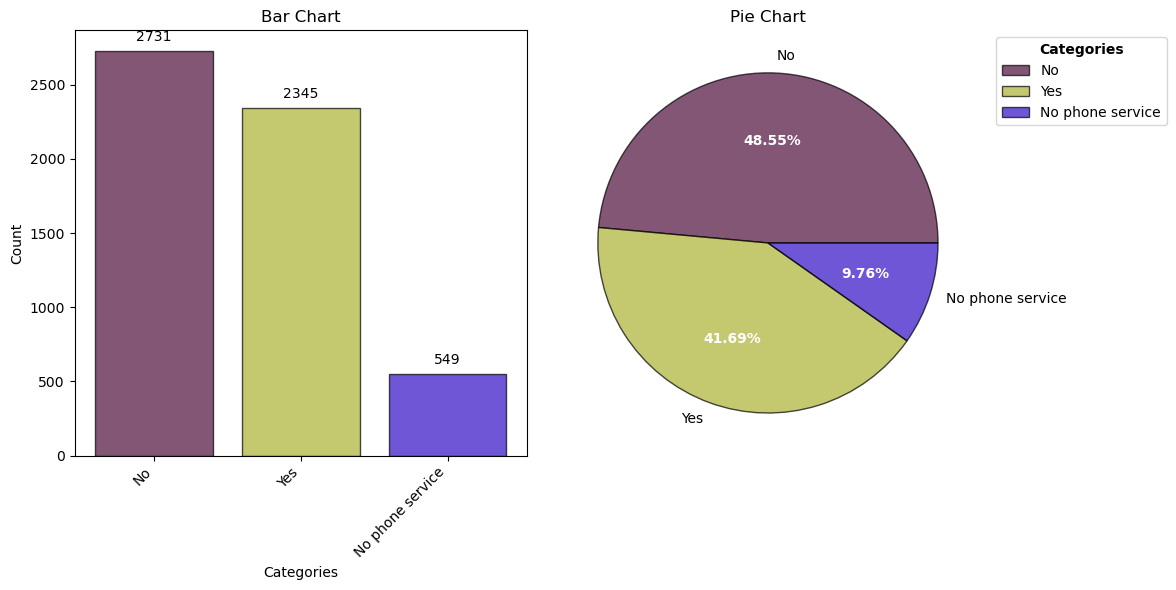

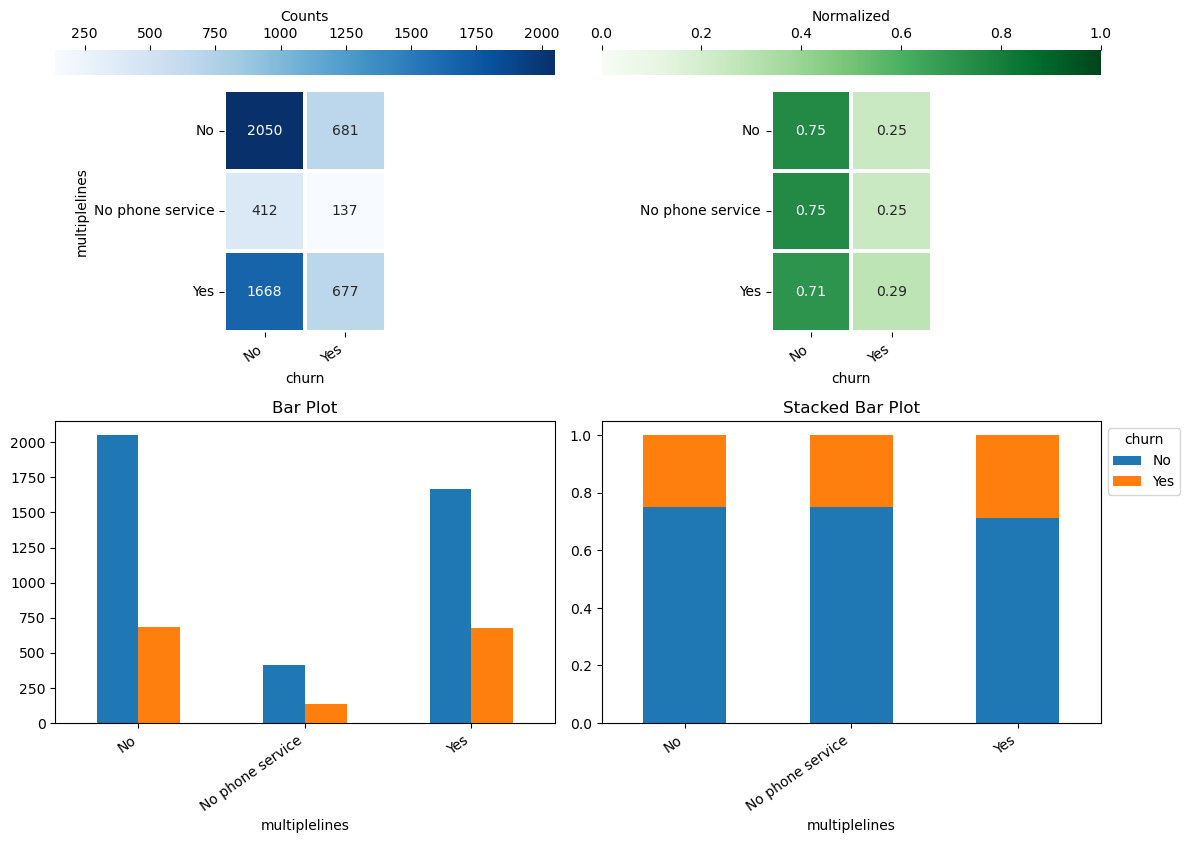

- Cramers V            : 0.0396180721495454
- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 10.827738727809734
- p-value              : 0.004454371239632786
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables multiplelines and churn are correlated


0               DSL
1               DSL
2       Fiber optic
3               DSL
4       Fiber optic
           ...     
5620            DSL
5621    Fiber optic
5622    Fiber optic
5623             No
5624    Fiber optic
Name: internetservice, Length: 5625, dtype: object

Data Type      : object
Cardinality    : 3 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 5,625 / 5,625 rows


,
count,5625
unique,3
top,Fiber optic
freq,2472


,count,percentage
category,,
Fiber optic,2472,0.439467
DSL,1920,0.341333
No,1233,0.219200


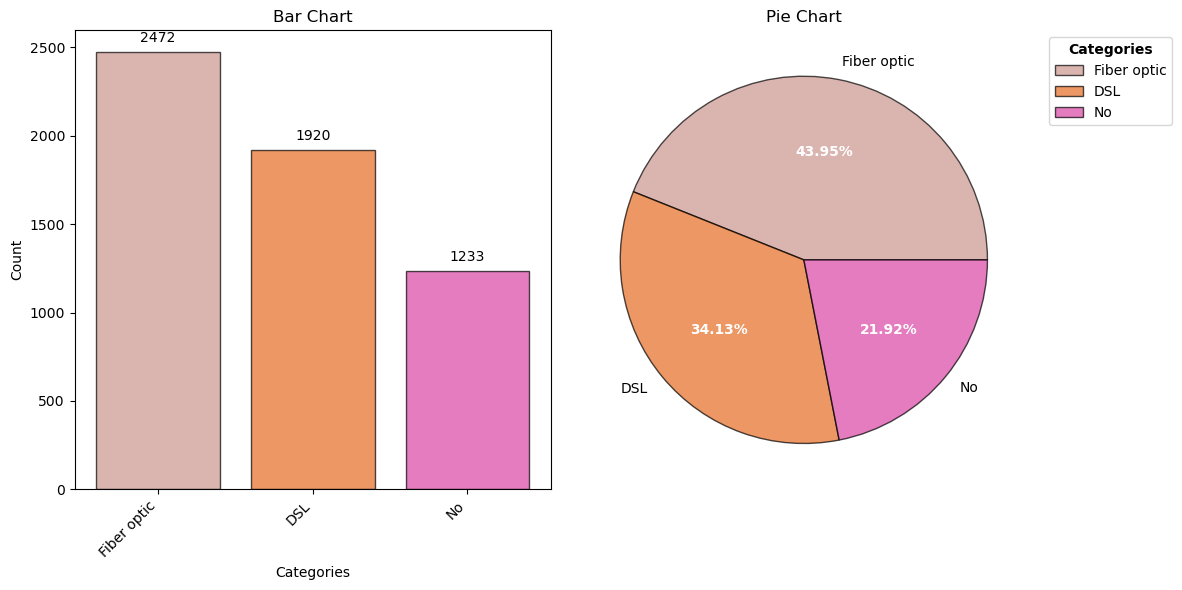

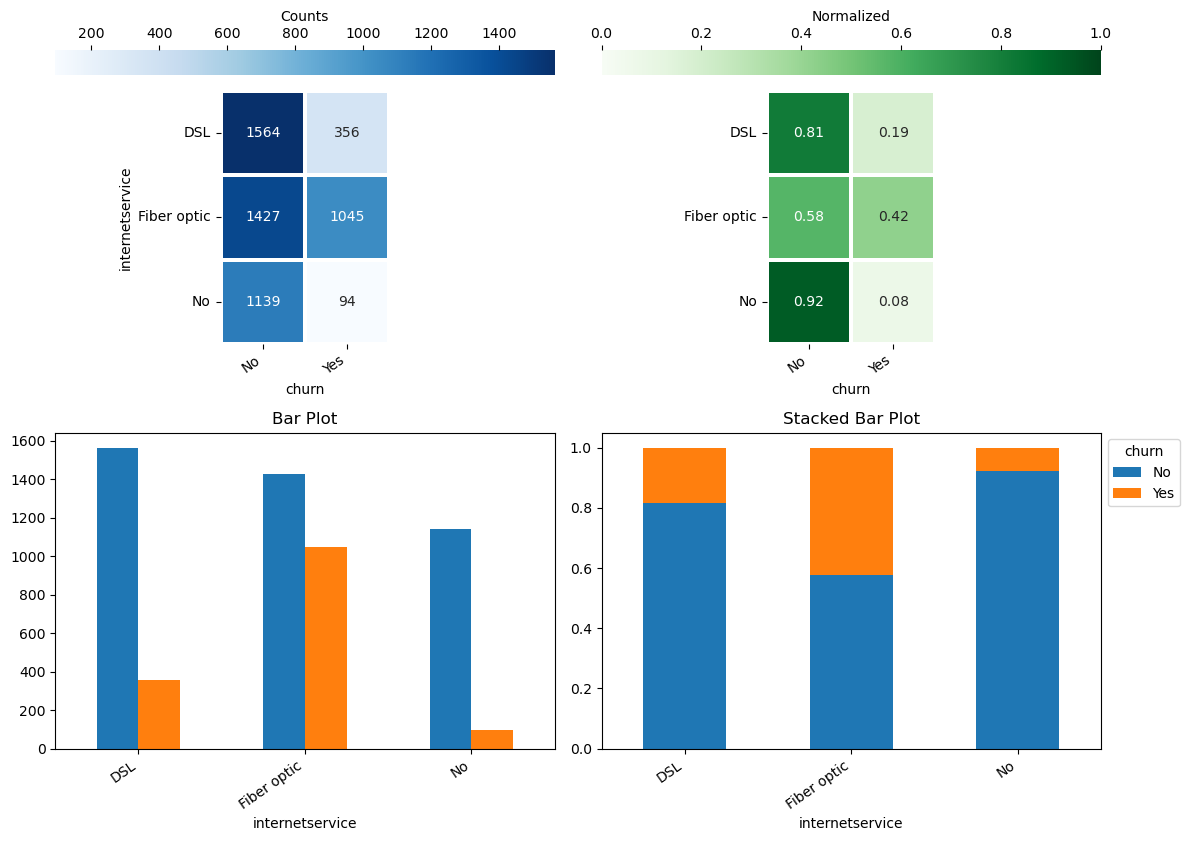

- Cramers V            : 0.3267952660704554
- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 602.6162373177569
- p-value              : 1.3917034818955566e-131
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables internetservice and churn are correlated


0                        No
1                        No
2                        No
3                       Yes
4                       Yes
               ...         
5620                     No
5621                     No
5622                    Yes
5623    No internet service
5624                     No
Name: onlinesecurity, Length: 5625, dtype: object

Data Type      : object
Cardinality    : 3 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 5,625 / 5,625 rows


,
count,5625
unique,3
top,No
freq,2775


,count,percentage
category,,
No,2775,0.493333
Yes,1617,0.287467
No internet service,1233,0.219200


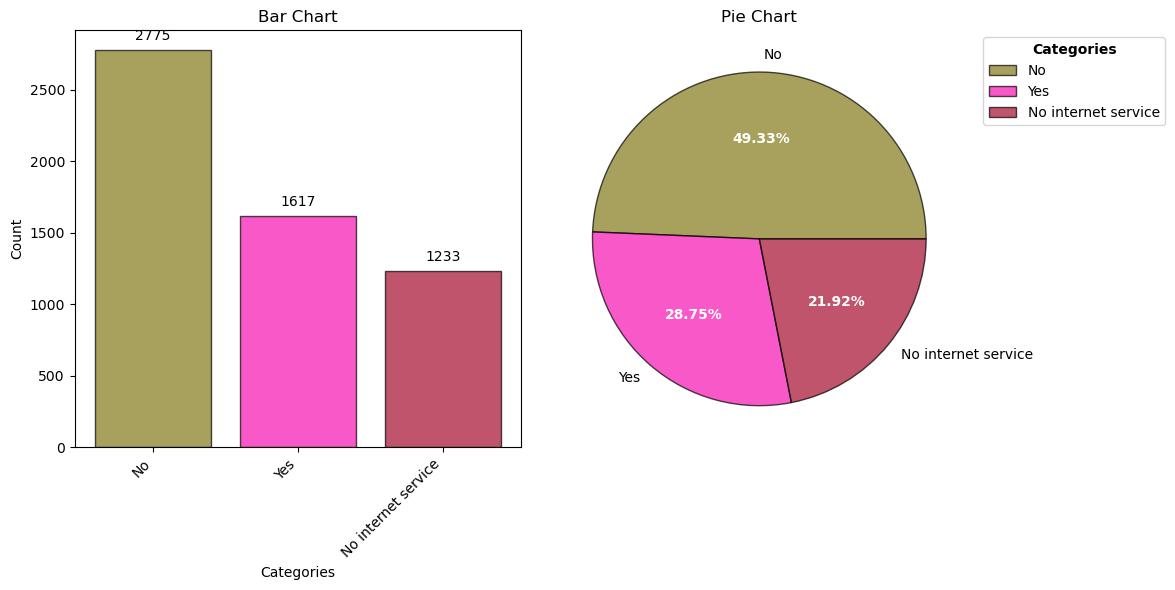

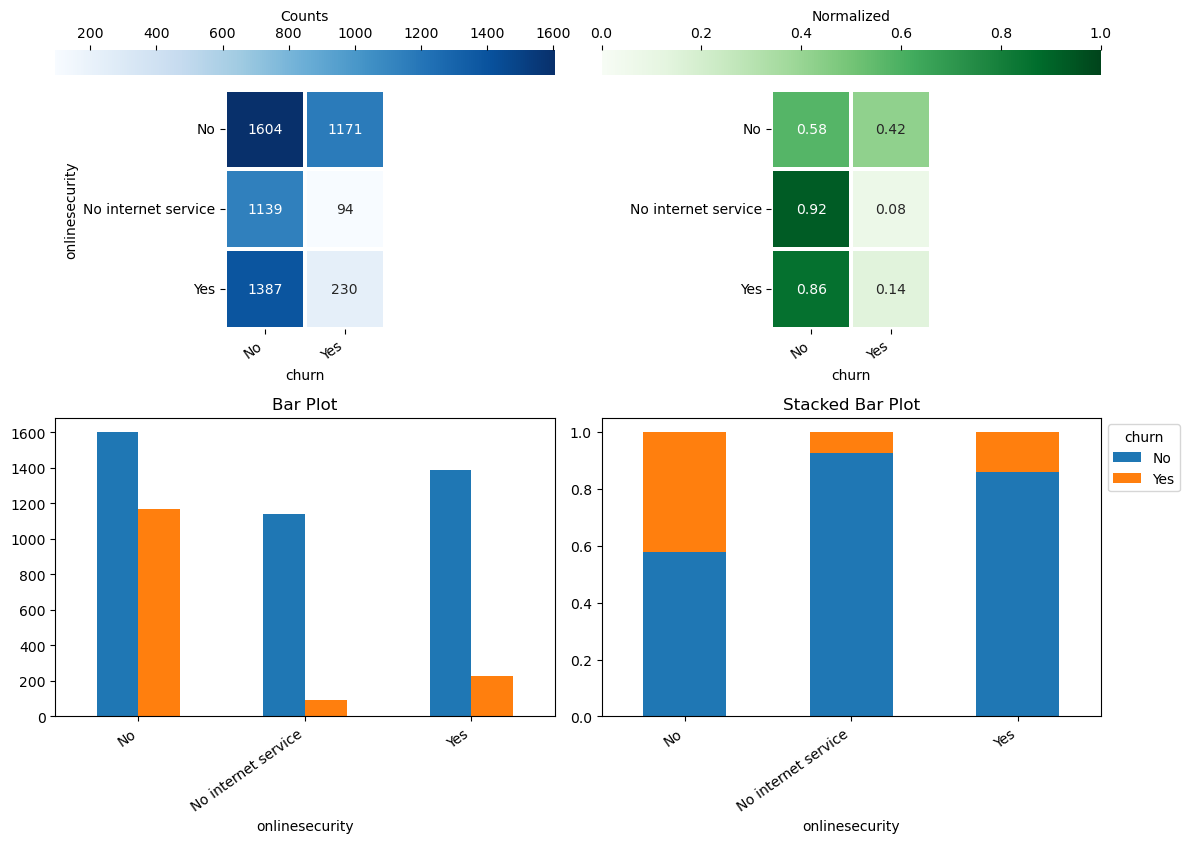

- Cramers V            : 0.3524053778151716
- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 700.4423644973235
- p-value              : 7.959267551085378e-153
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables onlinesecurity and churn are correlated


0                        No
1                        No
2                        No
3                        No
4                        No
               ...         
5620                     No
5621                    Yes
5622                     No
5623    No internet service
5624                    Yes
Name: onlinebackup, Length: 5625, dtype: object

Data Type      : object
Cardinality    : 3 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 5,625 / 5,625 rows


,
count,5625
unique,3
top,No
freq,2443


,count,percentage
category,,
No,2443,0.434311
Yes,1949,0.346489
No internet service,1233,0.219200


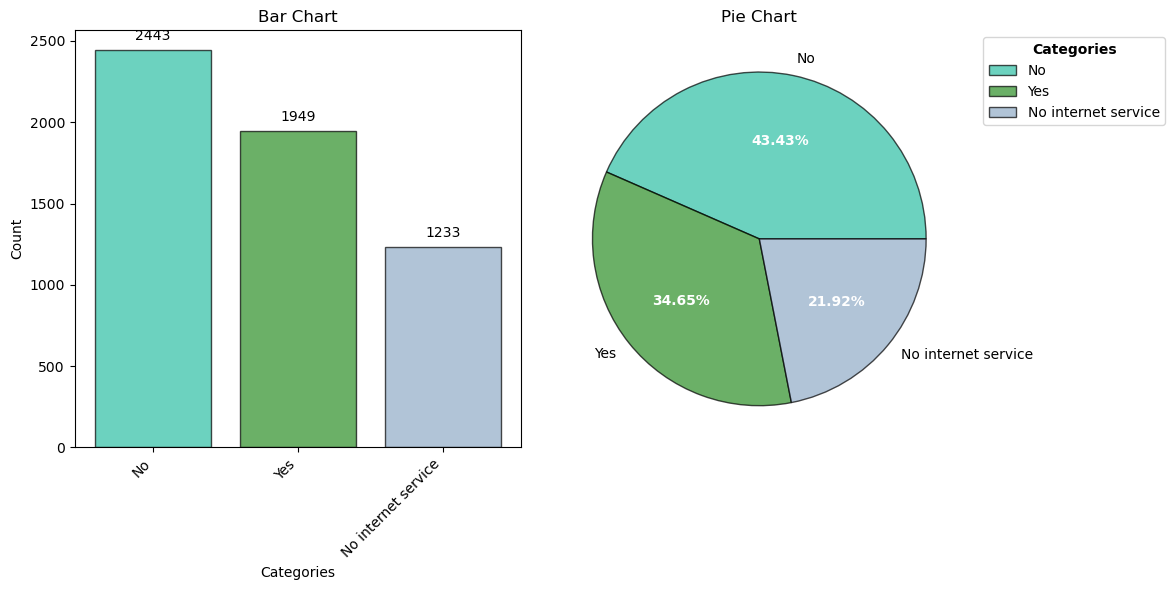

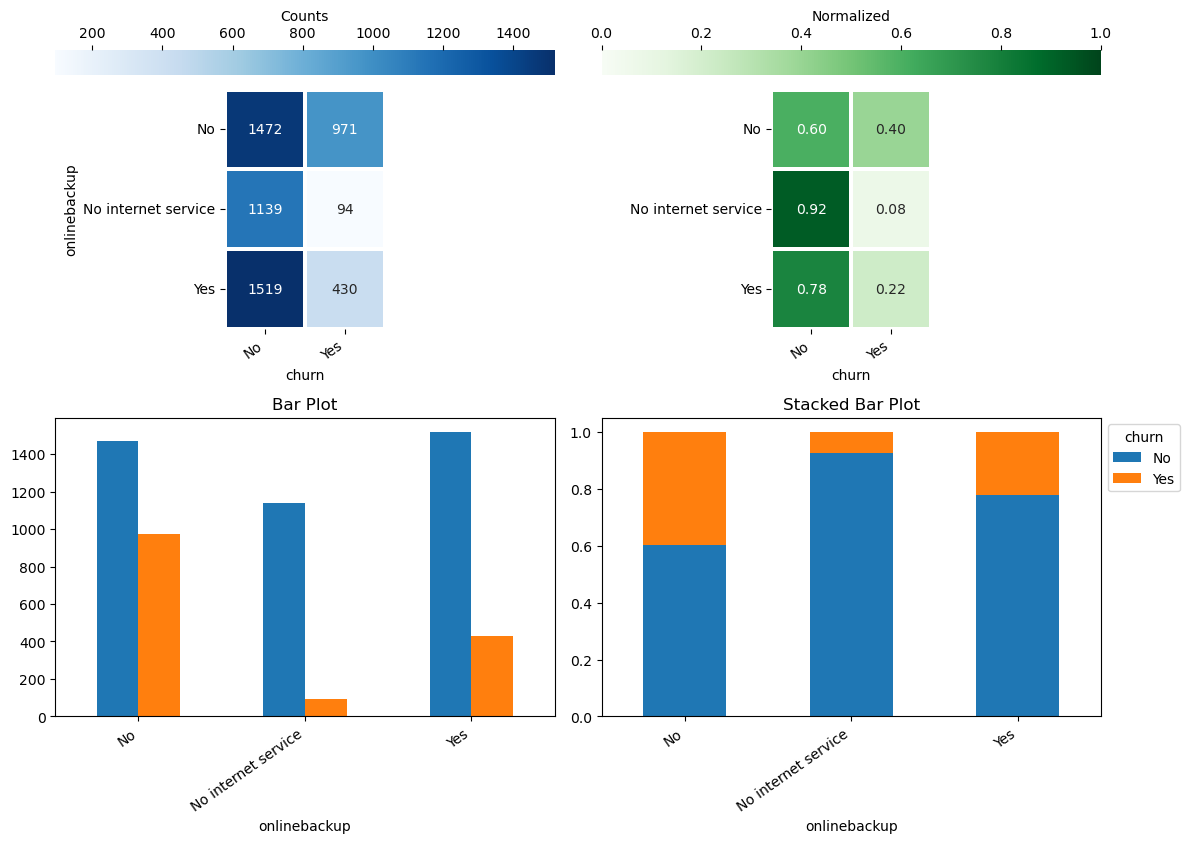

- Cramers V            : 0.2867550638330844
- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 464.45323734692863
- p-value              : 1.3972076636403197e-101
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables onlinebackup and churn are correlated


0                       Yes
1                        No
2                       Yes
3                        No
4                        No
               ...         
5620                     No
5621                    Yes
5622                     No
5623    No internet service
5624                     No
Name: deviceprotection, Length: 5625, dtype: object

Data Type      : object
Cardinality    : 3 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 5,625 / 5,625 rows


,
count,5625
unique,3
top,No
freq,2464


,count,percentage
category,,
No,2464,0.438044
Yes,1928,0.342756
No internet service,1233,0.219200


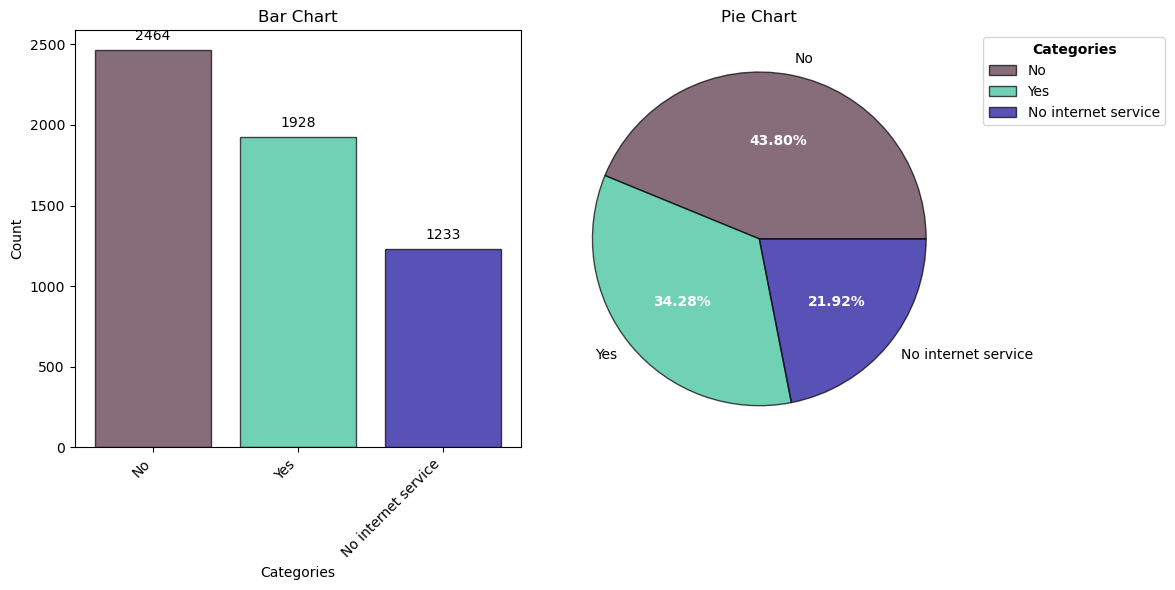

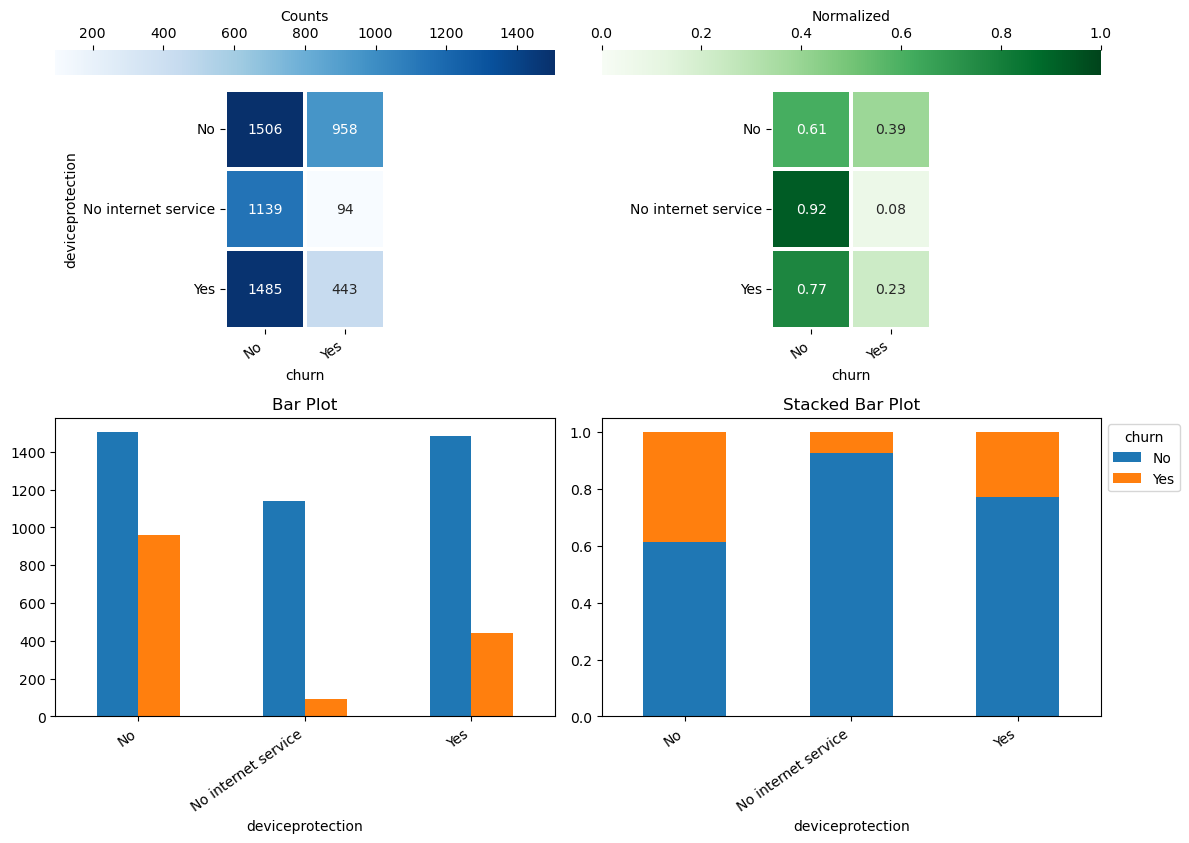

- Cramers V            : 0.27615766416983506
- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 430.9037660765438
- p-value              : 2.694238766815782e-94
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables deviceprotection and churn are correlated


0                        No
1                        No
2                        No
3                       Yes
4                        No
               ...         
5620                     No
5621                    Yes
5622                     No
5623    No internet service
5624                     No
Name: techsupport, Length: 5625, dtype: object

Data Type      : object
Cardinality    : 3 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 5,625 / 5,625 rows


,
count,5625
unique,3
top,No
freq,2762


,count,percentage
category,,
No,2762,0.491022
Yes,1630,0.289778
No internet service,1233,0.219200


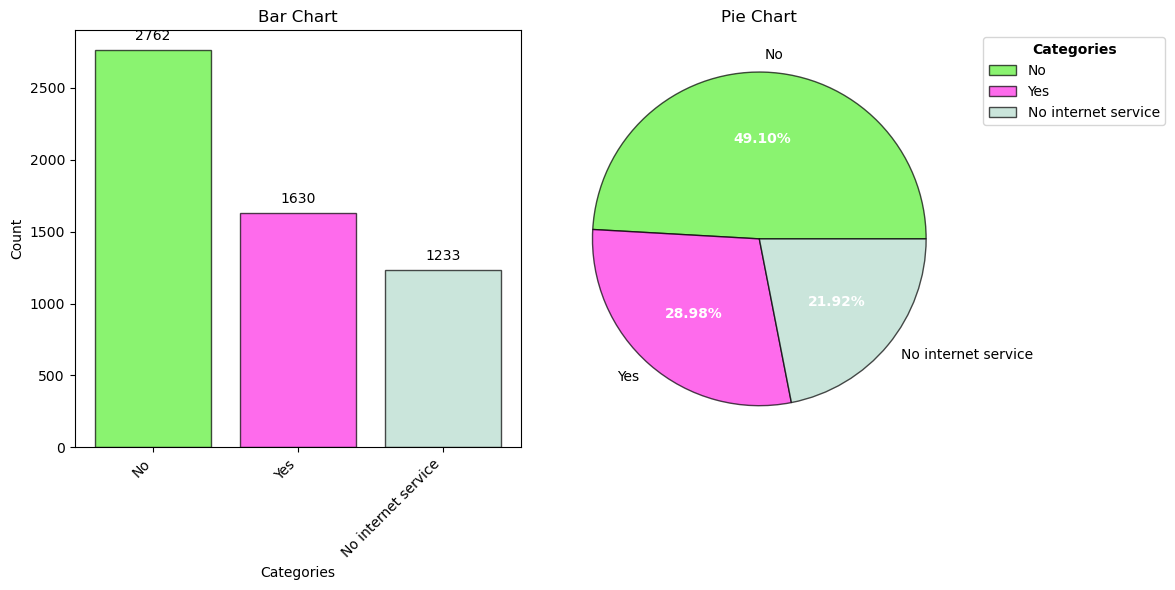

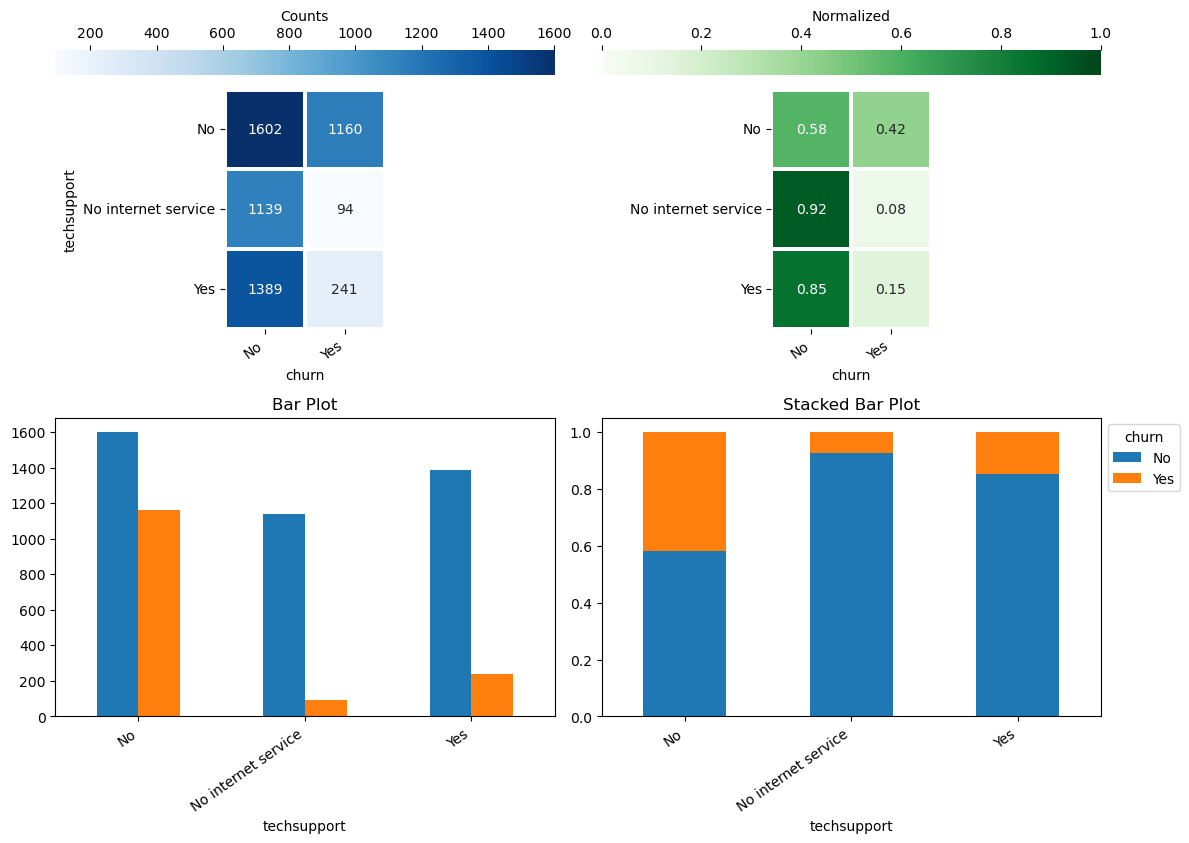

- Cramers V            : 0.3471430039316837
- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 679.7388175563573
- p-value              : 2.4922476772725924e-148
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables techsupport and churn are correlated


0                       Yes
1                       Yes
2                        No
3                        No
4                       Yes
               ...         
5620                     No
5621                    Yes
5622                     No
5623    No internet service
5624                     No
Name: streamingtv, Length: 5625, dtype: object

Data Type      : object
Cardinality    : 3 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 5,625 / 5,625 rows


,
count,5625
unique,3
top,No
freq,2222


,count,percentage
category,,
No,2222,0.395022
Yes,2170,0.385778
No internet service,1233,0.219200


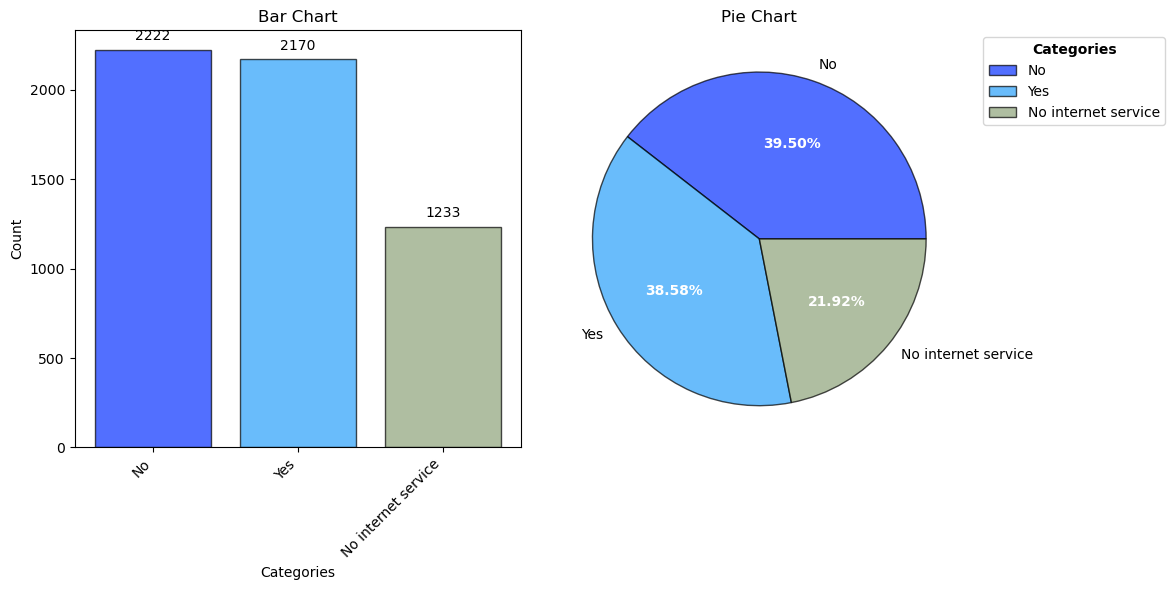

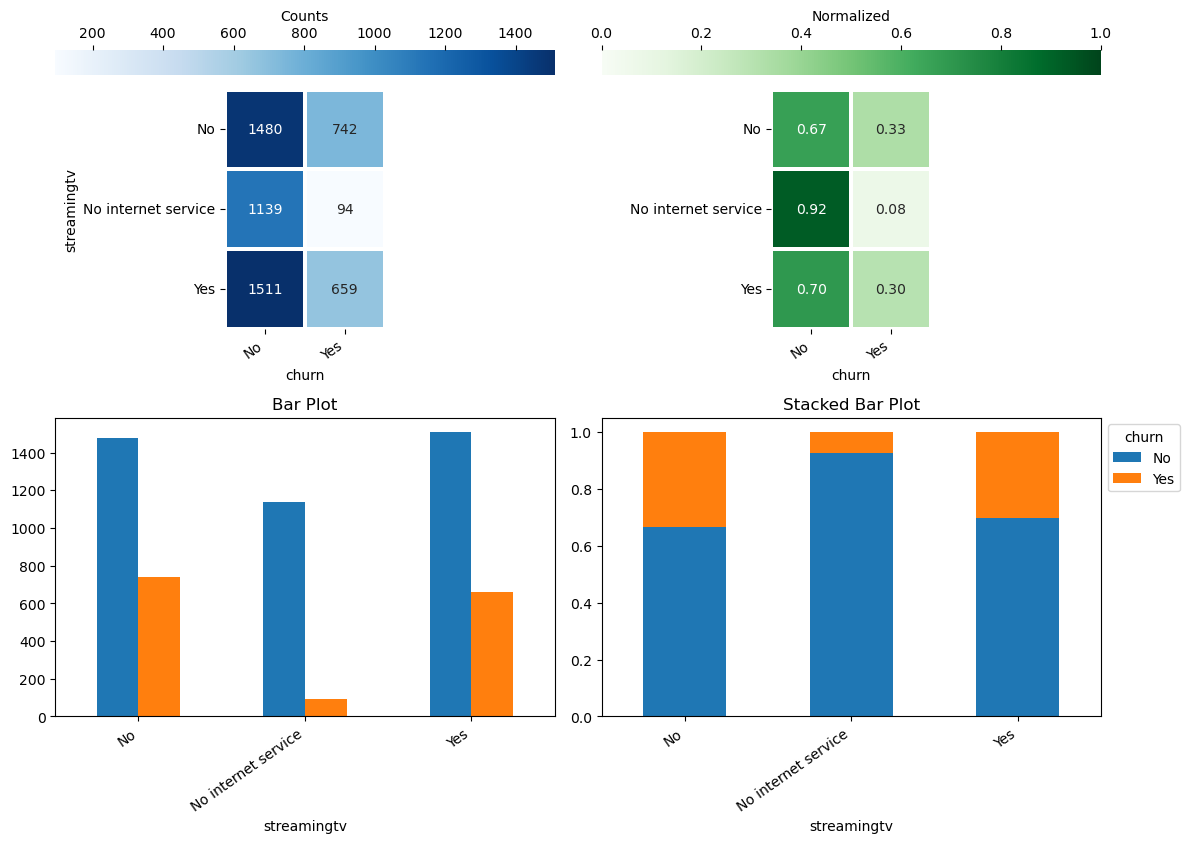

- Cramers V            : 0.22858966807230352
- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 295.87254755671944
- p-value              : 5.650574753417983e-65
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables streamingtv and churn are correlated


0                       Yes
1                        No
2                        No
3                        No
4                       Yes
               ...         
5620                     No
5621                    Yes
5622                     No
5623    No internet service
5624                     No
Name: streamingmovies, Length: 5625, dtype: object

Data Type      : object
Cardinality    : 3 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 5,625 / 5,625 rows


,
count,5625
unique,3
top,Yes
freq,2201


,count,percentage
category,,
Yes,2201,0.391289
No,2191,0.389511
No internet service,1233,0.219200


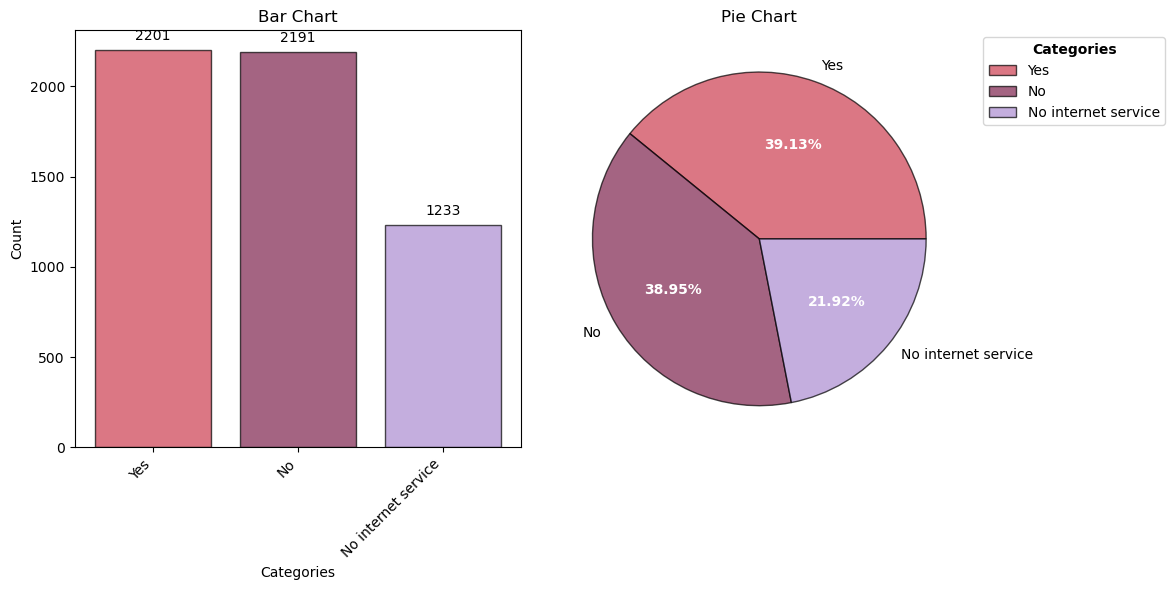

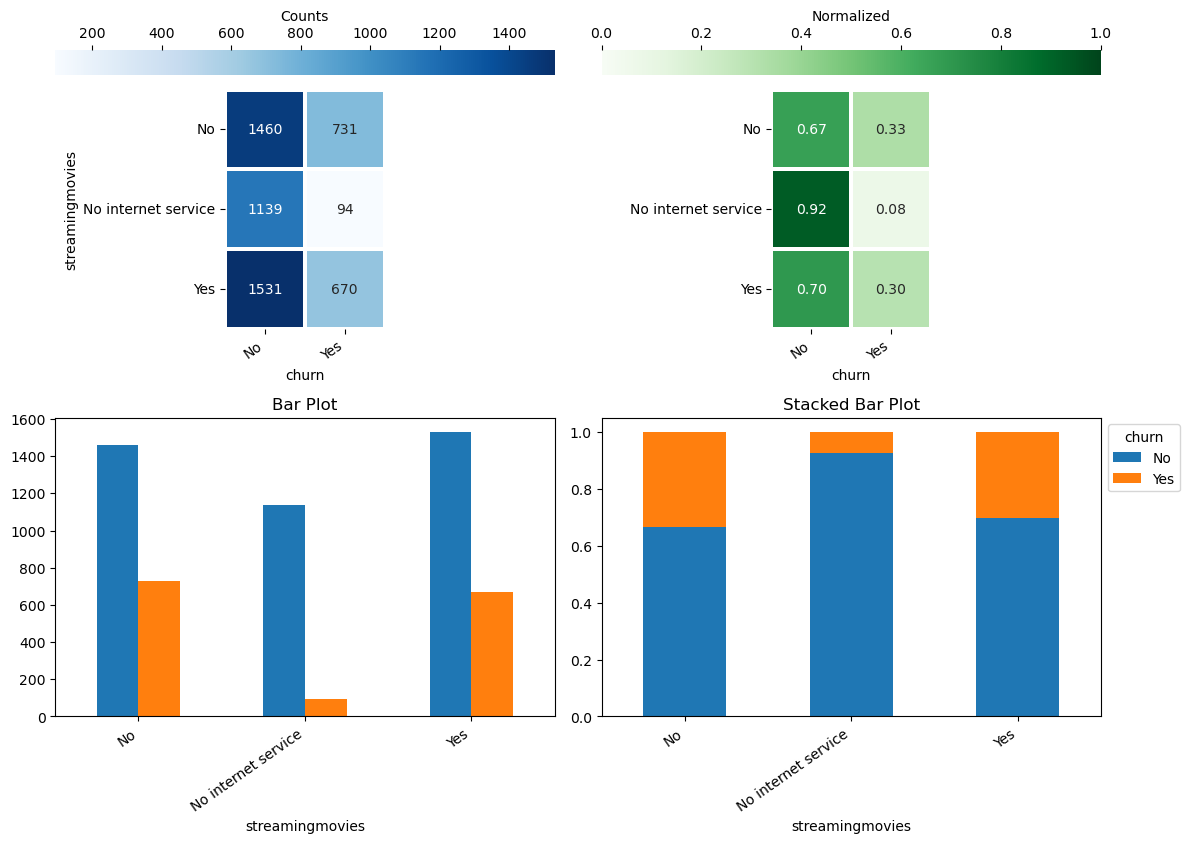

- Cramers V            : 0.22845762819533683
- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 295.53314777910356
- p-value              : 6.695643928736146e-65
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables streamingmovies and churn are correlated


0       Month-to-month
1       Month-to-month
2       Month-to-month
3             Two year
4             One year
             ...      
5620    Month-to-month
5621          One year
5622    Month-to-month
5623          One year
5624    Month-to-month
Name: contract, Length: 5625, dtype: object

Data Type      : object
Cardinality    : 3 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 5,625 / 5,625 rows


,
count,5625
unique,3
top,Month-to-month
freq,3087


,count,percentage
category,,
Month-to-month,3087,0.548800
Two year,1347,0.239467
One year,1191,0.211733


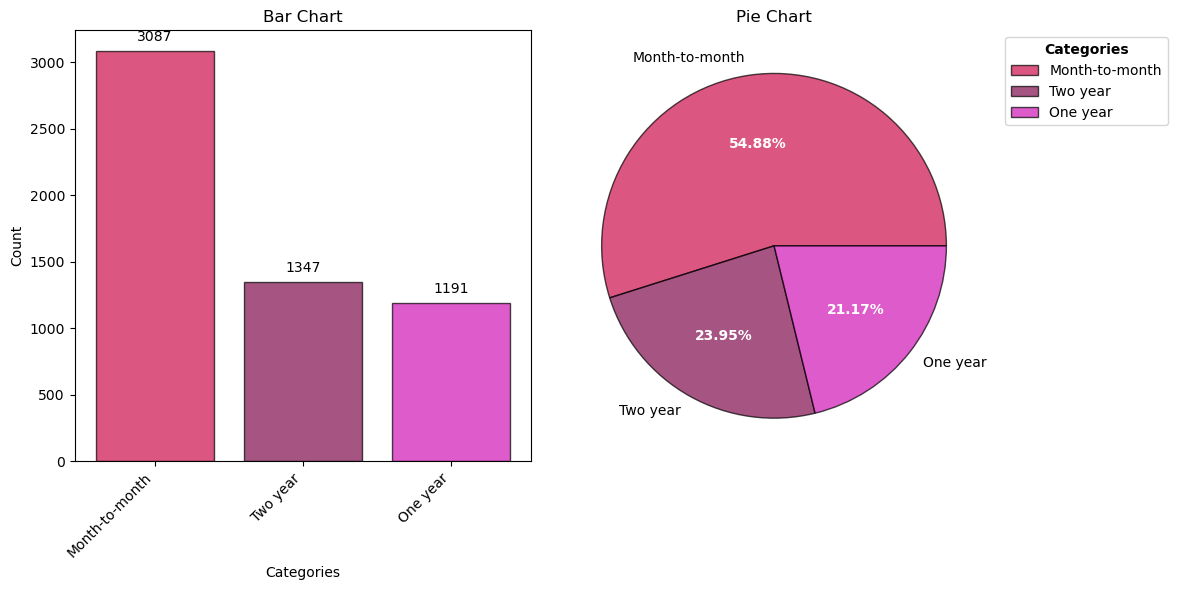

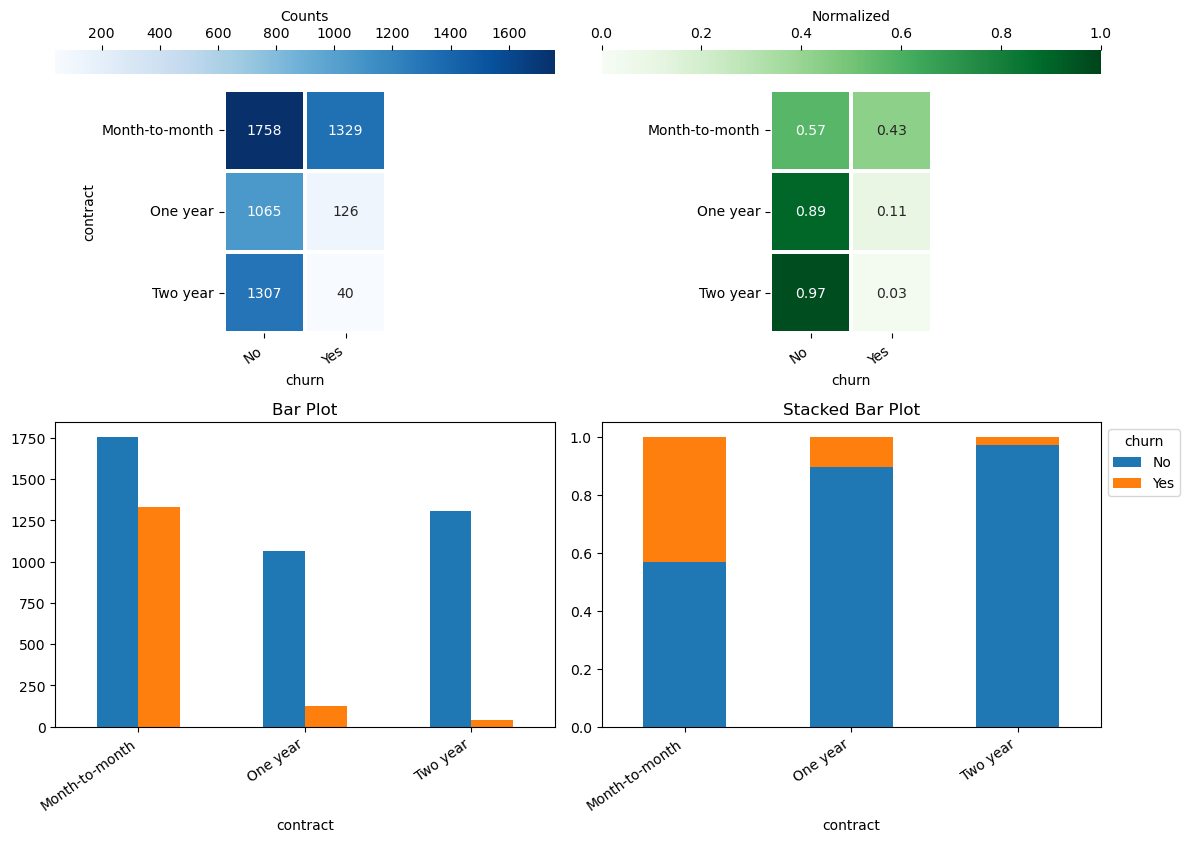

- Cramers V            : 0.4149263619391091
- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 970.2500189257273
- p-value              : 2.05534796342097e-211
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables contract and churn are correlated


0       Yes
1        No
2       Yes
3        No
4        No
       ... 
5620     No
5621    Yes
5622    Yes
5623     No
5624    Yes
Name: paperlessbilling, Length: 5625, dtype: object

Data Type      : object
Cardinality    : 2 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 5,625 / 5,625 rows


,
count,5625
unique,2
top,Yes
freq,3326


,count,percentage
category,,
Yes,3326,0.591289
No,2299,0.408711


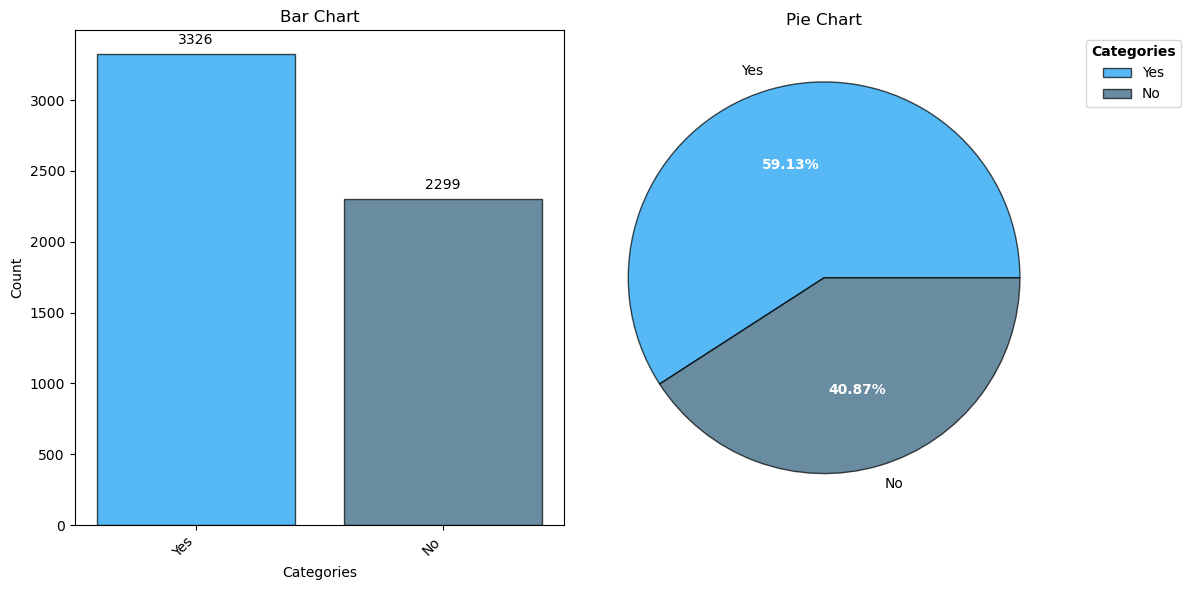

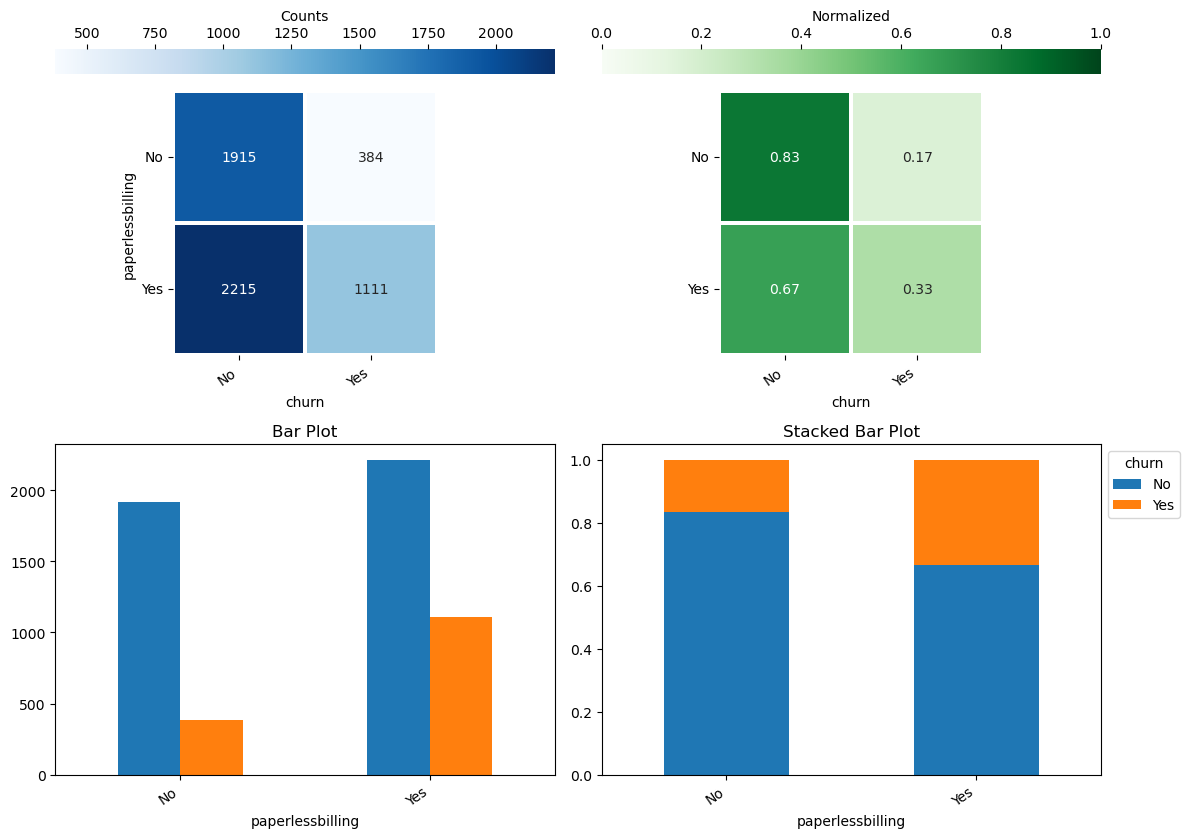

- Cramers V            : 0.18497870907236622
- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 193.43727040914752
- p-value              : 5.650457023401761e-44
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables paperlessbilling and churn are correlated


0       Bank transfer (automatic)
1         Credit card (automatic)
2                Electronic check
3       Bank transfer (automatic)
4                    Mailed check
                  ...            
5620    Bank transfer (automatic)
5621             Electronic check
5622             Electronic check
5623    Bank transfer (automatic)
5624             Electronic check
Name: paymentmethod, Length: 5625, dtype: object

Data Type      : object
Cardinality    : 4 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 5,625 / 5,625 rows


,
count,5625
unique,4
top,Electronic check
freq,1902


,count,percentage
category,,
Electronic check,1902,0.338133
Mailed check,1297,0.230578
Credit card (automatic),1225,0.217778
Bank transfer (automatic),1201,0.213511


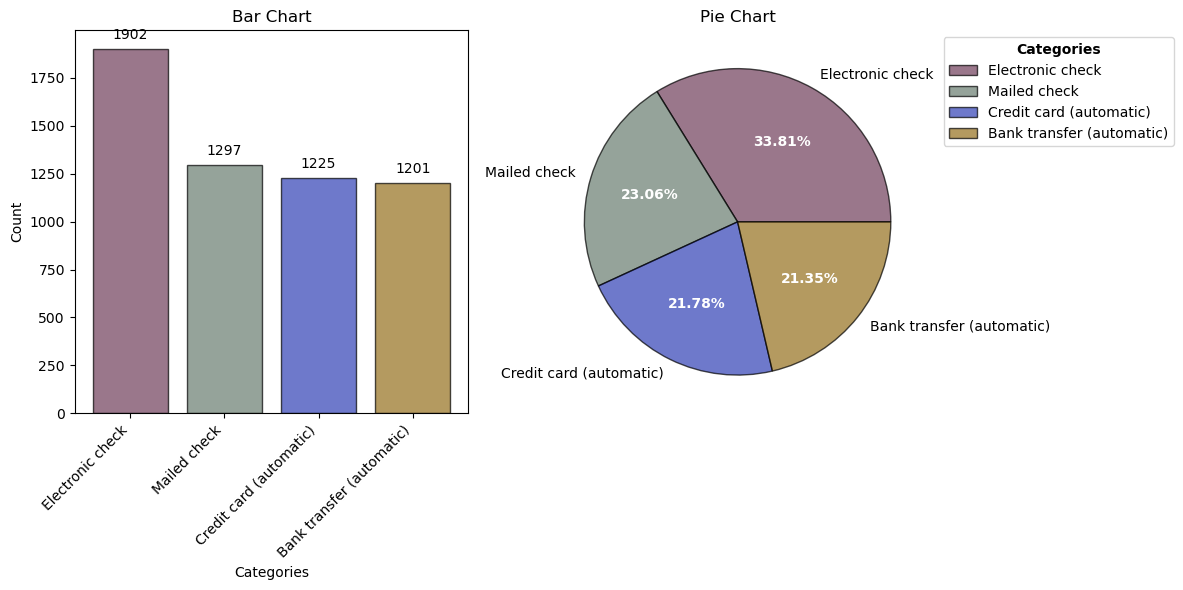

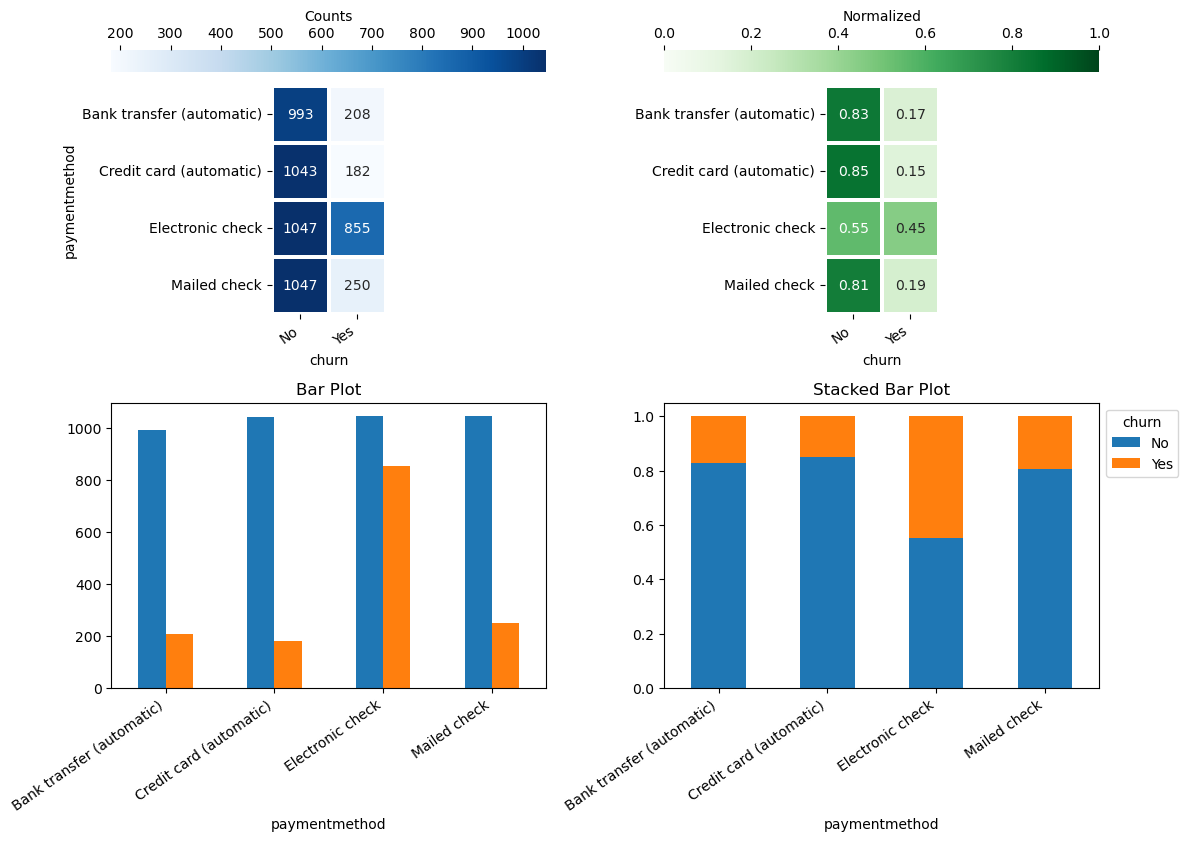

- Cramers V            : 0.2983271464609095
- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 503.5313790417142
- p-value              : 8.191502774023594e-109
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables paymentmethod and churn are correlated


In [11]:
categorical_cols = train.select_dtypes(include='object').columns.tolist()
numerical_cols = train.select_dtypes(include=['int64', 'float64']).columns.tolist()



# Remove target column 'churn' from loops (will be used as reference)
target_col = 'churn'

categorical_features = [col for col in categorical_cols if col != target_col]
numerical_features = numerical_cols

# Categorical analysis loop
for col in categorical_features:
    eda.cat_summary(train, col)
    eda.cat_univar_plots(train, col)
    eda.cat_bivar_plots(train, var1=col, var2=target_col)
    eda.hyp_cat_cat(train, col, target_col)


## gender
Observation:
- Very little difference in churn rate.
- Female: 26.9% churn, Male: 26.2% churn.
Association with Churn:
- Not statistically significant.
- No gender-specific targeting needed.

## seniorcitizen
Observation:
- Seniors churn more (~41.7%) compared to non-seniors (~23.7%).
Association with Churn:
- Strong positive correlation with churn.
Recommendation:
- Offer senior-friendly support.
- Provide simplified plans or dedicated helplines.

## partner
Observation:
- No partner: 33% churn, Partner: 19.7% churn.
Association with Churn:
- Statistically significant.
Recommendation:
- Target non-partnered individuals with loyalty or bundle offers.

## dependents

Observation:
- Without dependents: 31.3% churn, With dependents: 15.5% churn.
Association with Churn:
- Strong association.
Recommendation:
- Promote family plans to users without dependents.

## phoneservice

Observation:
- Slight difference; not a major churn driver.
Association with Churn:
- Weak.
Recommendation:
- Focus on bundled services rather than just phone services.

## multiplelines

Observation:
- Single line: 25% churn, Multiple lines: 28.6% churn.
Association with Churn:
- Moderate.
Recommendation:
- Offer bundled discounts to multiple line users.

## internetservice

Observation:
- Fiber: 41.9% churn, DSL: 19%, No Internet: 7.4%.
Association with Churn:
- Strong.
Recommendation:
- Investigate fiber service dissatisfaction.
- Improve support and reliability.

## onlinesecurity

Observation:
- Without security: 41.8% churn, With security: 14.6%.
Association with Churn:
- Very strong.
Recommendation:
- Bundle online security in basic plans.
- Promote benefits of cybersecurity.

## onlinebackup

Observation:
- No backup: 39.9% churn, With backup: 21.6%.
Association with Churn:
- Strong.
Recommendation:
- Provide free trial of backup for new users.

## deviceprotection

Observation:
- No protection: 39.1%, With protection: 22.5%.
Association with Churn:
- Strong.
Recommendation:
- Cross-sell protection service with device upgrades.

## techsupport

Observation:
- Without support: 41.6% churn, With support: 15.2%.
Association with Churn:
- Very strong.
Recommendation:
- Include tech support in all plans.

## streamingtv

Observation:
- Slightly higher churn without TV.
Association with Churn:
- Weak to moderate.
Recommendation:
- Emphasize entertainment bundle value.

## streamingmovies

Observation:
- Similar churn across groups.
Association with Churn:
- Weak.
Recommendation:
- Not a strong churn predictor. Use as a bonus feature.

## contract

Observation:
- Month-to-month: 42.7% churn, One year: 11.3%, Two year: 2.8%.
Association with Churn:
- Extremely strong.
Recommendation:
- Offer discounts or perks for long-term contract sign-ups.

## paperlessbilling

Observation:
- Paperless: 33.6% churn, Not paperless: 16.4%.
Association with Churn:
- Moderate.
Recommendation:
- Make paperless billing default but offer education on usage.

## paymentmethod

Observation:
- Electronic check: 45.3% churn; Auto-payment: ~15–17% churn.
Association with Churn:
- Very strong.
Recommendation:
- Incentivize auto-payment sign-up with discounts.

## Plot-Based General Insights

- Churn is highest among users with flexible contracts, electronic payments, and no add-on services.
- Features like tech support, online security, and long-term commitment show a strong reduction in churn.

## Actionable Business Recommendations

1. **Promote Long-Term Contracts**: Offer discounts or free services for users choosing 1- or 2-year contracts.
2. **Push Add-On Services**: Bundle online security, tech support, and backups in starter plans.
3. **Auto-Pay Incentives**: Give a ₹50/month discount or extra data to users enabling auto-pay.
4. **Senior Plans**: Design simple, value-based plans with quick support for senior citizens.
5. **Family-Focused Marketing**: Introduce dependent-based loyalty points or family data bundles.
6. **Churn Prediction**: Use a model to flag high-risk users (e.g., month-to-month, fiber users without support) and trigger retention offers.


0       43
1        3
2       55
3       45
4       55
        ..
5620     3
5621    51
5622     9
5623    50
5624    20
Name: tenure, Length: 5625, dtype: int64

Data Type      : int64
Missing Data   : 0 rows (0.00 %)
Available Data : 5,625 / 5,625 rows


,value
percentile,
0,1.0
5,1.0
10,2.0
25,9.0
50,29.0
75,55.0
90,69.0
95,71.0
99,72.0


,value
mean,32.335289
trimmed mean (5%),31.873000
trimmed mean (10%),31.379027
median,29.000000


,value
var,602.071416
std,24.537144
IQR,46.000000
mad,22.000000
coef_variance,0.758835


,value
skewness,0.242015
kurtosis,-1.385914


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 9.509731121938831e-51
Test Statistic       : 0.9033946449753621
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.786
Test Statistic       : 162.87352886877852
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


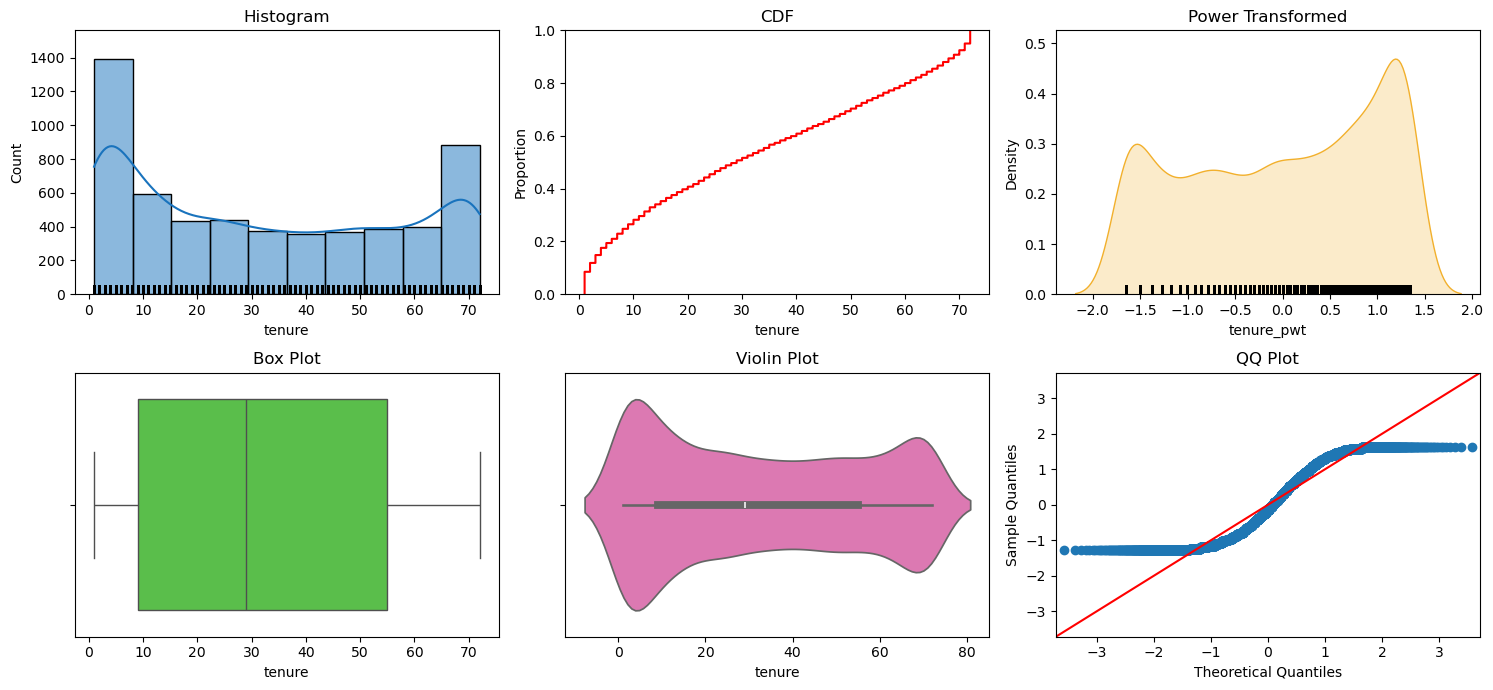

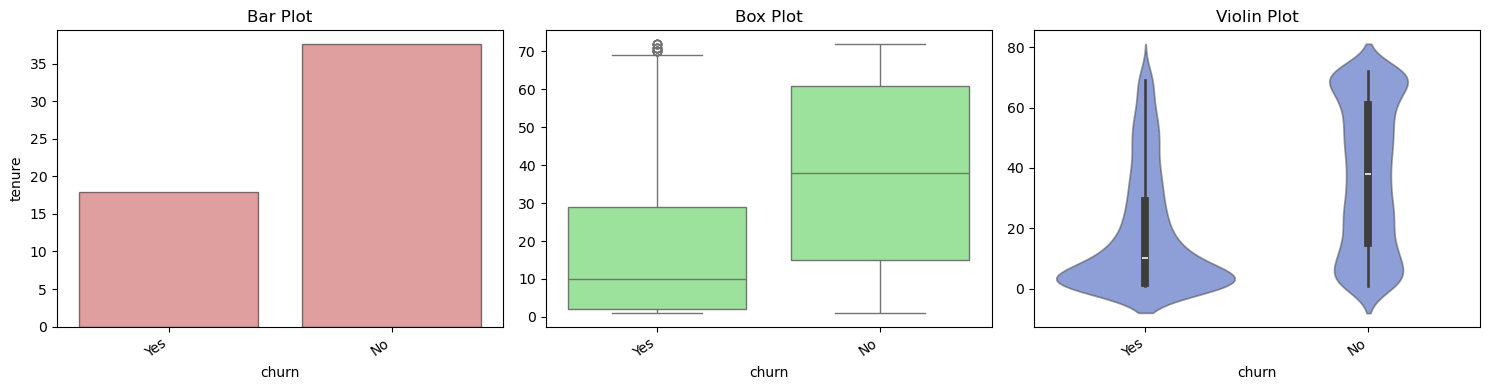

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 803.7843602165105
- p-value              : 2.181350510488631e-165
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables tenure and churn are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 768.1098218686291
- p-value              : 4.6316555860830634e-169
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables tenure and churn are associated to each other


0        49.05
1        53.40
2        77.75
3        54.65
4       100.90
         ...  
5620     50.40
5621    111.50
5622     81.15
5623     19.75
5624     73.65
Name: monthlycharges, Length: 5625, dtype: float64

Data Type      : float64
Missing Data   : 0 rows (0.00 %)
Available Data : 5,625 / 5,625 rows


,value
percentile,
0,18.25
5,19.65
10,20.05
25,35.20
50,70.35
75,89.90
90,102.74
95,107.35
99,114.60


,value
mean,64.697431
trimmed mean (5%),64.618102
trimmed mean (10%),64.889669
median,70.350000


,value
var,910.467112
std,30.173948
IQR,54.700000
mad,24.200000
coef_variance,0.466386


,value
skewness,-0.217908
kurtosis,-1.268722


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 1.1742866509722598e-47
Test Statistic       : 0.9195589909147648
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.786
Test Statistic       : 138.9335924609868
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


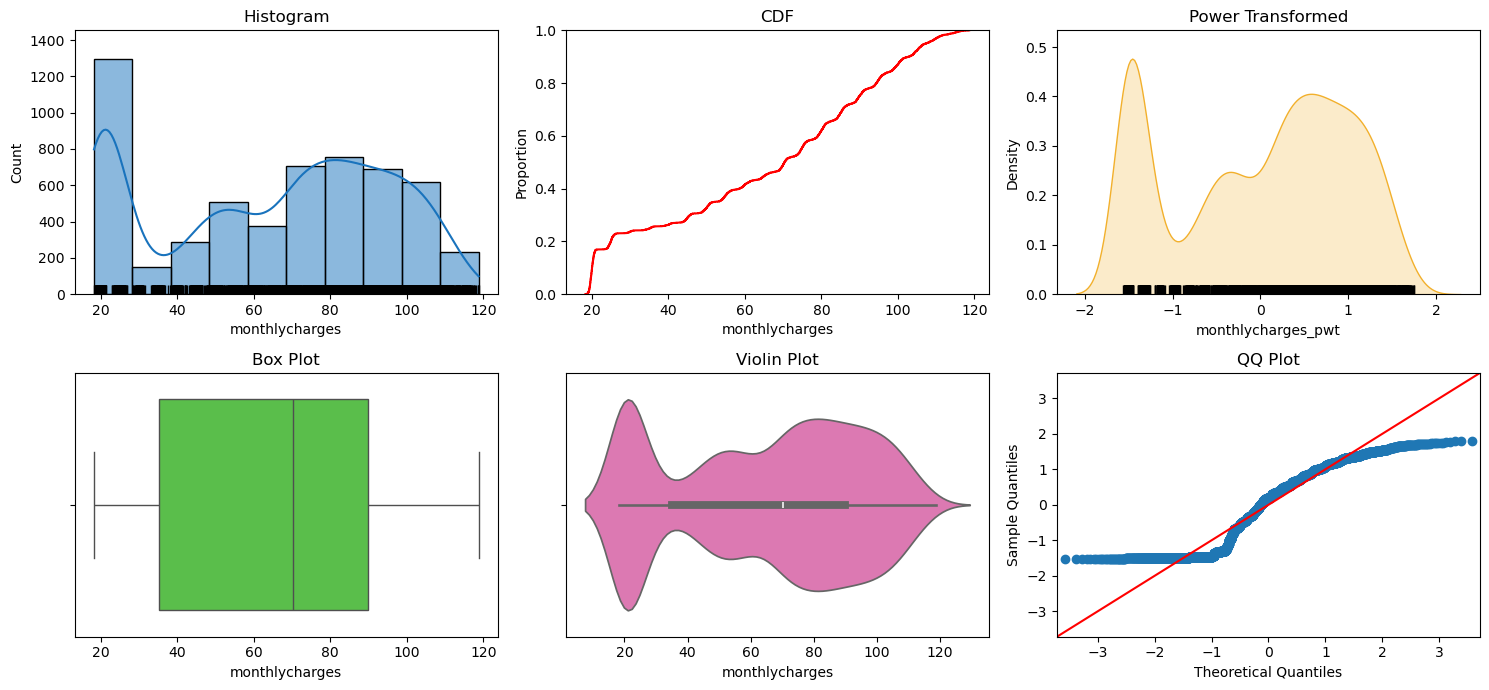

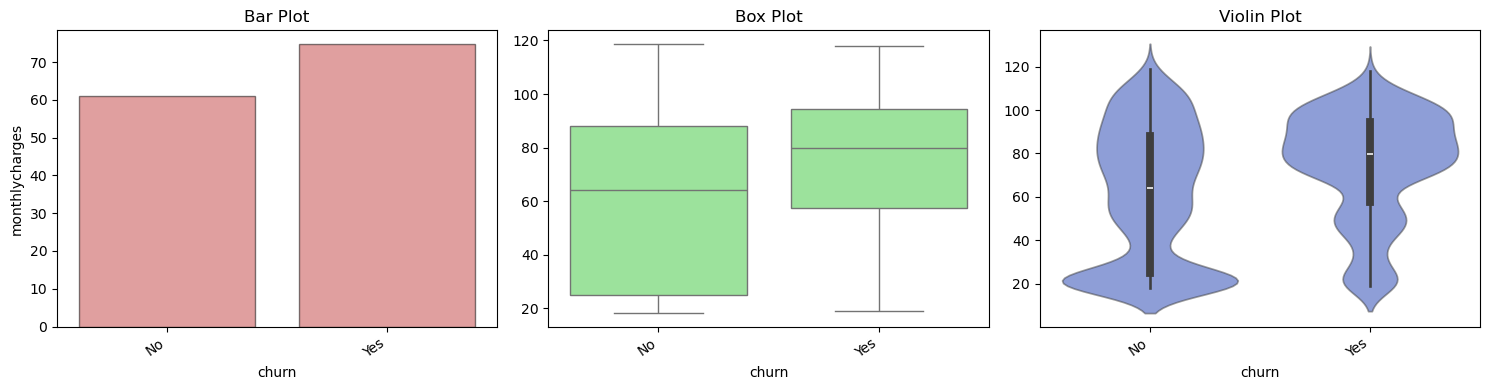

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 230.77561297025474
- p-value              : 4.130014599232289e-51
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables monthlycharges and churn are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 203.07266418923433
- p-value              : 4.459977634351827e-46
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables monthlycharges and churn are associated to each other


0       2076.20
1        188.70
2       4458.15
3       2553.70
4       5448.60
         ...   
5620     137.25
5621    5703.25
5622     784.45
5623     989.05
5624    1463.50
Name: totalcharges, Length: 5625, dtype: float64

Data Type      : float64
Missing Data   : 0 rows (0.00 %)
Available Data : 5,625 / 5,625 rows


,value
percentile,
0,18.85
5,49.81
10,84.69
25,397.00
50,1388.00
75,3767.40
90,5974.64
95,6935.36
99,8021.35


,value
mean,2275.300871
trimmed mean (5%),2103.691171
trimmed mean (10%),1959.856088
median,1388.000000


,value
var,5.130602e+06
std,2.265083e+03
IQR,3.370400e+03
mad,1.213300e+03
coef_variance,9.955093e-01


,value
skewness,0.969682
kurtosis,-0.214342


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 2.096021759295006e-57
Test Statistic       : 0.8593515163486765
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.786
Test Statistic       : 278.043389977016
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


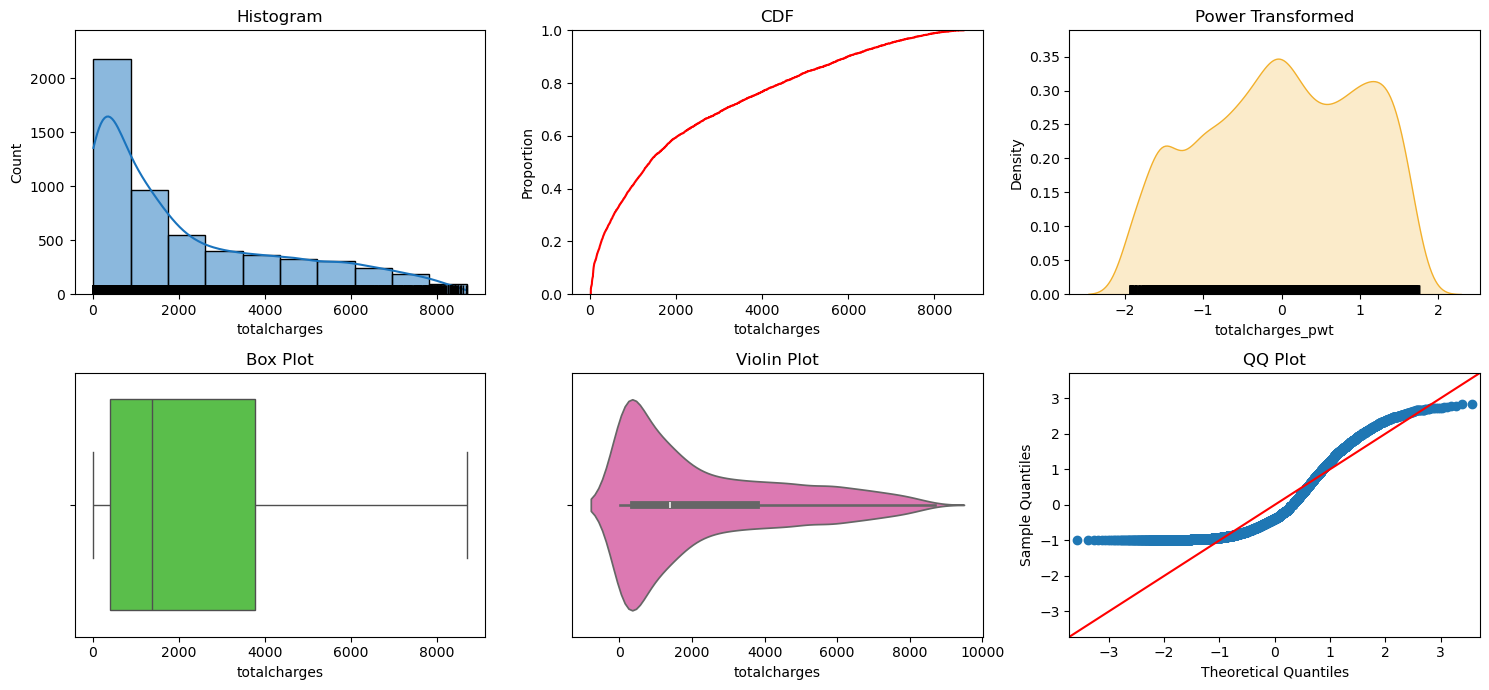

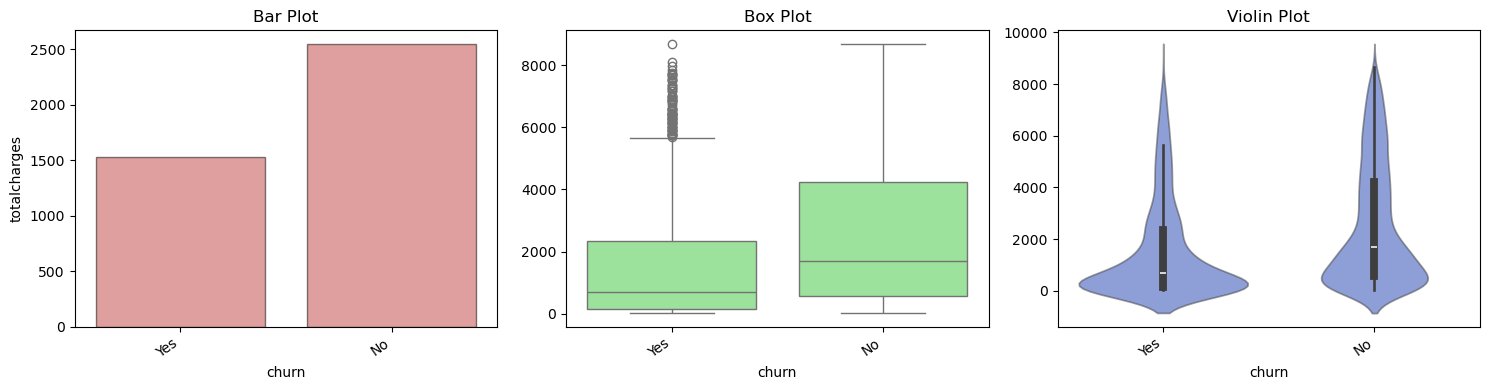

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 227.36643472193526
- p-value              : 2.1396620326224255e-50
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables totalcharges and churn are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 296.6883400424821
- p-value              : 1.7349369101846029e-66
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables totalcharges and churn are associated to each other


In [12]:
# Numerical analysis loop
for col in numerical_features:
    eda.num_summary(train, col)
    eda.num_univar_plots(train, col)
    eda.num_cat_bivar_plots(train, num_var=col, cat_var=target_col)
    eda.num_cat_hyp_testing(train, num_var=col, cat_var=target_col)

##  tenure

Observation:
- Churn is highest among customers with low tenure (<12 months).
- As tenure increases, churn decreases significantly.
Association with Churn:
- Very strong negative correlation.
Actionable Insight:
- Target new users early with retention offers (e.g., loyalty discounts at 3 or 6 months).
- Educate customers about benefits of long-term commitment.

## monthlycharges

Observation:
- Higher monthly charges are associated with higher churn.
- Customers paying above ₹90 churn significantly more than those in lower charge bands.
Association with Churn:
- Moderate to strong.
Actionable Insight:
- Improve perceived value for high-paying customers.
- Introduce tiered plans with rewards or premium support.

## totalcharges

Observation:
- Customers with low total charges churn the most.
- Higher total charges indicate customer longevity and lower churn.
Association with Churn:
- Strong negative correlation.
Actionable Insight:
- Identify high totalcharge users as loyal customers.
- Reward them with upgrades or loyalty perks.
- Re-engage low totalcharge users with welcome bonuses or tutorials.
